In [1]:
%config Completer.use_jedi = False

In [86]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import contextily as cx
import osmnx as ox
import networkx as nx
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar

In [3]:
sf_2017 = pd.read_csv('data/2017-fordgobike-tripdata.csv')

In [4]:
sf_2017.head()

duration_sec                start_time                  end_time  \
0         80110  2017-12-31 16:57:39.6540  2018-01-01 15:12:50.2450   
1         78800  2017-12-31 15:56:34.8420  2018-01-01 13:49:55.6170   
2         45768  2017-12-31 22:45:48.4110  2018-01-01 11:28:36.8830   
3         62172  2017-12-31 17:31:10.6360  2018-01-01 10:47:23.5310   
4         43603  2017-12-31 14:23:14.0010  2018-01-01 02:29:57.5710   

   start_station_id                                 start_station_name  \
0                74                              Laguna St at Hayes St   
1               284  Yerba Buena Center for the Arts (Howard St at ...   
2               245                             Downtown Berkeley BART   
3                60                               8th St at Ringold St   
4               239                      Bancroft Way at Telegraph Ave   

   start_station_latitude  start_station_longitude  end_station_id  \
0               37.776435              -122.426244              43   
1               37.784872              -122.400876              96   
2               37.870348              -122.267764             245   
3               37.774520              -122.409449               5   
4               37.868813              -122.258764             247   

                                    end_station_name  end_station_latitude  \
0  San Francisco Public Library (Grove St at Hyde...             37.778768   
1                              Dolores St at 15th St             37.766210   
2                             Downtown Berkeley BART             37.870348   
3       Powell St BART Station (Market St at 5th St)             37.783899   
4                          Fulton St at Bancroft Way             37.867789   

   end_station_longitude  bike_id   user_type  member_birth_year member_gender  
0            -122.415929       96    Customer             1987.0          Male  
1            -122.426614       88    Customer             1965.0        Female  
2            -122.267764     1094    Customer                NaN           NaN  
3            -122.408445     2831    Customer                NaN           NaN  
4            -122.265896     3167  Subscriber             1997.0        Female

In [5]:
sf_boundary = gpd.read_file('urbanized_areas2000.shp')

In [6]:
sf_boundary.head()

GIST_ID COUNTY UACODE                        NAME    SHAPE_area  \
0        4  06097  68887                Petaluma, CA  5.149226e+08   
1        5  06097  79498              Santa Rosa, CA  2.850234e+09   
2        7  06013  02683                 Antioch, CA  1.681262e+09   
3        9  06013  19504                 Concord, CA  4.205173e+09   
4       11  06013  78904  San Francisco--Oakland, CA  1.144841e+09   

       SHAPE_len                                           geometry  
0  234026.333268  POLYGON ((5925951.424 2291123.394, 5925898.582...  
1  936524.446521  MULTIPOLYGON (((5895021.517 2401251.681, 58951...  
2  448458.324670  POLYGON ((6173570.234 2182651.892, 6173952.178...  
3  912169.761231  MULTIPOLYGON (((6091955.485 2187006.869, 60919...  
4  382701.829856  POLYGON ((6050376.888 2204516.262, 6050809.866...

In [7]:
city_shape = sf_boundary[sf_boundary['GIST_ID'] == 19]

<AxesSubplot:>

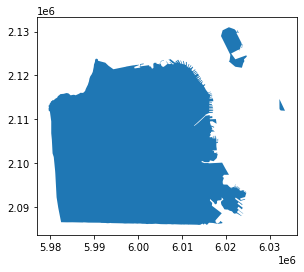

In [8]:
city_shape.plot()

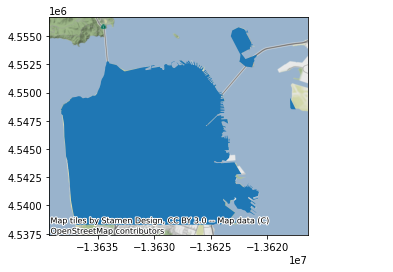

In [9]:
ax = city_shape.to_crs('EPSG:3857').plot()
cx.add_basemap(ax)

In [131]:
city_limits = city_shape.to_crs(epsg=4326)

In [10]:
w, s ,e ,n = city_shape.to_crs(epsg=4326).total_bounds

In [11]:
station_locs = gpd.GeoDataFrame(sf_2017, geometry =\
                                gpd.points_from_xy(sf_2017.start_station_longitude, sf_2017.start_station_latitude))

In [12]:
station_locs = station_locs.set_crs(epsg=4326, inplace=True)

In [13]:
station_locs.head()

duration_sec                start_time                  end_time  \
0         80110  2017-12-31 16:57:39.6540  2018-01-01 15:12:50.2450   
1         78800  2017-12-31 15:56:34.8420  2018-01-01 13:49:55.6170   
2         45768  2017-12-31 22:45:48.4110  2018-01-01 11:28:36.8830   
3         62172  2017-12-31 17:31:10.6360  2018-01-01 10:47:23.5310   
4         43603  2017-12-31 14:23:14.0010  2018-01-01 02:29:57.5710   

   start_station_id                                 start_station_name  \
0                74                              Laguna St at Hayes St   
1               284  Yerba Buena Center for the Arts (Howard St at ...   
2               245                             Downtown Berkeley BART   
3                60                               8th St at Ringold St   
4               239                      Bancroft Way at Telegraph Ave   

   start_station_latitude  start_station_longitude  end_station_id  \
0               37.776435              -122.426244              43   
1               37.784872              -122.400876              96   
2               37.870348              -122.267764             245   
3               37.774520              -122.409449               5   
4               37.868813              -122.258764             247   

                                    end_station_name  end_station_latitude  \
0  San Francisco Public Library (Grove St at Hyde...             37.778768   
1                              Dolores St at 15th St             37.766210   
2                             Downtown Berkeley BART             37.870348   
3       Powell St BART Station (Market St at 5th St)             37.783899   
4                          Fulton St at Bancroft Way             37.867789   

   end_station_longitude  bike_id   user_type  member_birth_year  \
0            -122.415929       96    Customer             1987.0   
1            -122.426614       88    Customer             1965.0   
2            -122.267764     1094    Customer                NaN   
3            -122.408445     2831    Customer                NaN   
4            -122.265896     3167  Subscriber             1997.0   

  member_gender                     geometry  
0          Male  POINT (-122.42624 37.77643)  
1        Female  POINT (-122.40088 37.78487)  
2           NaN  POINT (-122.26776 37.87035)  
3           NaN  POINT (-122.40945 37.77452)  
4        Female  POINT (-122.25876 37.86881)

In [14]:
sf_stations = station_locs.cx[w:e,s:n]

In [15]:
sf_stations.head()

duration_sec                start_time                  end_time  \
0         80110  2017-12-31 16:57:39.6540  2018-01-01 15:12:50.2450   
1         78800  2017-12-31 15:56:34.8420  2018-01-01 13:49:55.6170   
3         62172  2017-12-31 17:31:10.6360  2018-01-01 10:47:23.5310   
5          9226  2017-12-31 22:51:00.9180  2018-01-01 01:24:47.1660   
7          4334  2017-12-31 23:46:37.1960  2018-01-01 00:58:51.2110   

   start_station_id                                 start_station_name  \
0                74                              Laguna St at Hayes St   
1               284  Yerba Buena Center for the Arts (Howard St at ...   
3                60                               8th St at Ringold St   
5                30     San Francisco Caltrain (Townsend St at 4th St)   
7               284  Yerba Buena Center for the Arts (Howard St at ...   

   start_station_latitude  start_station_longitude  end_station_id  \
0               37.776435              -122.426244              43   
1               37.784872              -122.400876              96   
3               37.774520              -122.409449               5   
5               37.776598              -122.395282              30   
7               37.784872              -122.400876             284   

                                    end_station_name  end_station_latitude  \
0  San Francisco Public Library (Grove St at Hyde...             37.778768   
1                              Dolores St at 15th St             37.766210   
3       Powell St BART Station (Market St at 5th St)             37.783899   
5     San Francisco Caltrain (Townsend St at 4th St)             37.776598   
7  Yerba Buena Center for the Arts (Howard St at ...             37.784872   

   end_station_longitude  bike_id user_type  member_birth_year member_gender  \
0            -122.415929       96  Customer             1987.0          Male   
1            -122.426614       88  Customer             1965.0        Female   
3            -122.408445     2831  Customer                NaN           NaN   
5            -122.395282     1487  Customer                NaN           NaN   
7            -122.400876     1503  Customer                NaN           NaN   

                      geometry  
0  POINT (-122.42624 37.77643)  
1  POINT (-122.40088 37.78487)  
3  POINT (-122.40945 37.77452)  
5  POINT (-122.39528 37.77660)  
7  POINT (-122.40088 37.78487)

In [16]:
cx.tile._calculate_zoom(w, s, e, n)

13

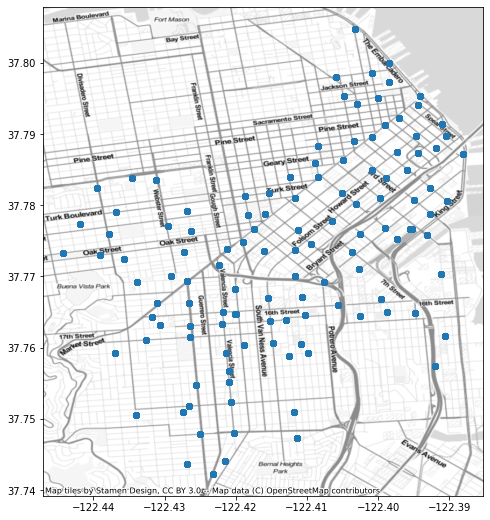

In [17]:
ax = sf_stations.plot(figsize=(9, 9))
cx.add_basemap(ax, crs=sf_stations.crs.to_string(), source=cx.providers.Stamen.TonerLite)

In [18]:
def add_scalebar(ax, length=5000, loc='lower right', **kwargs):
    scalebar = AnchoredSizeBar(ax.transData,
                           length, f'{length/1000:1.0f} km', loc, 
                           frameon=False,
                           size_vertical=1, **kwargs)
    ax.add_artist(scalebar)

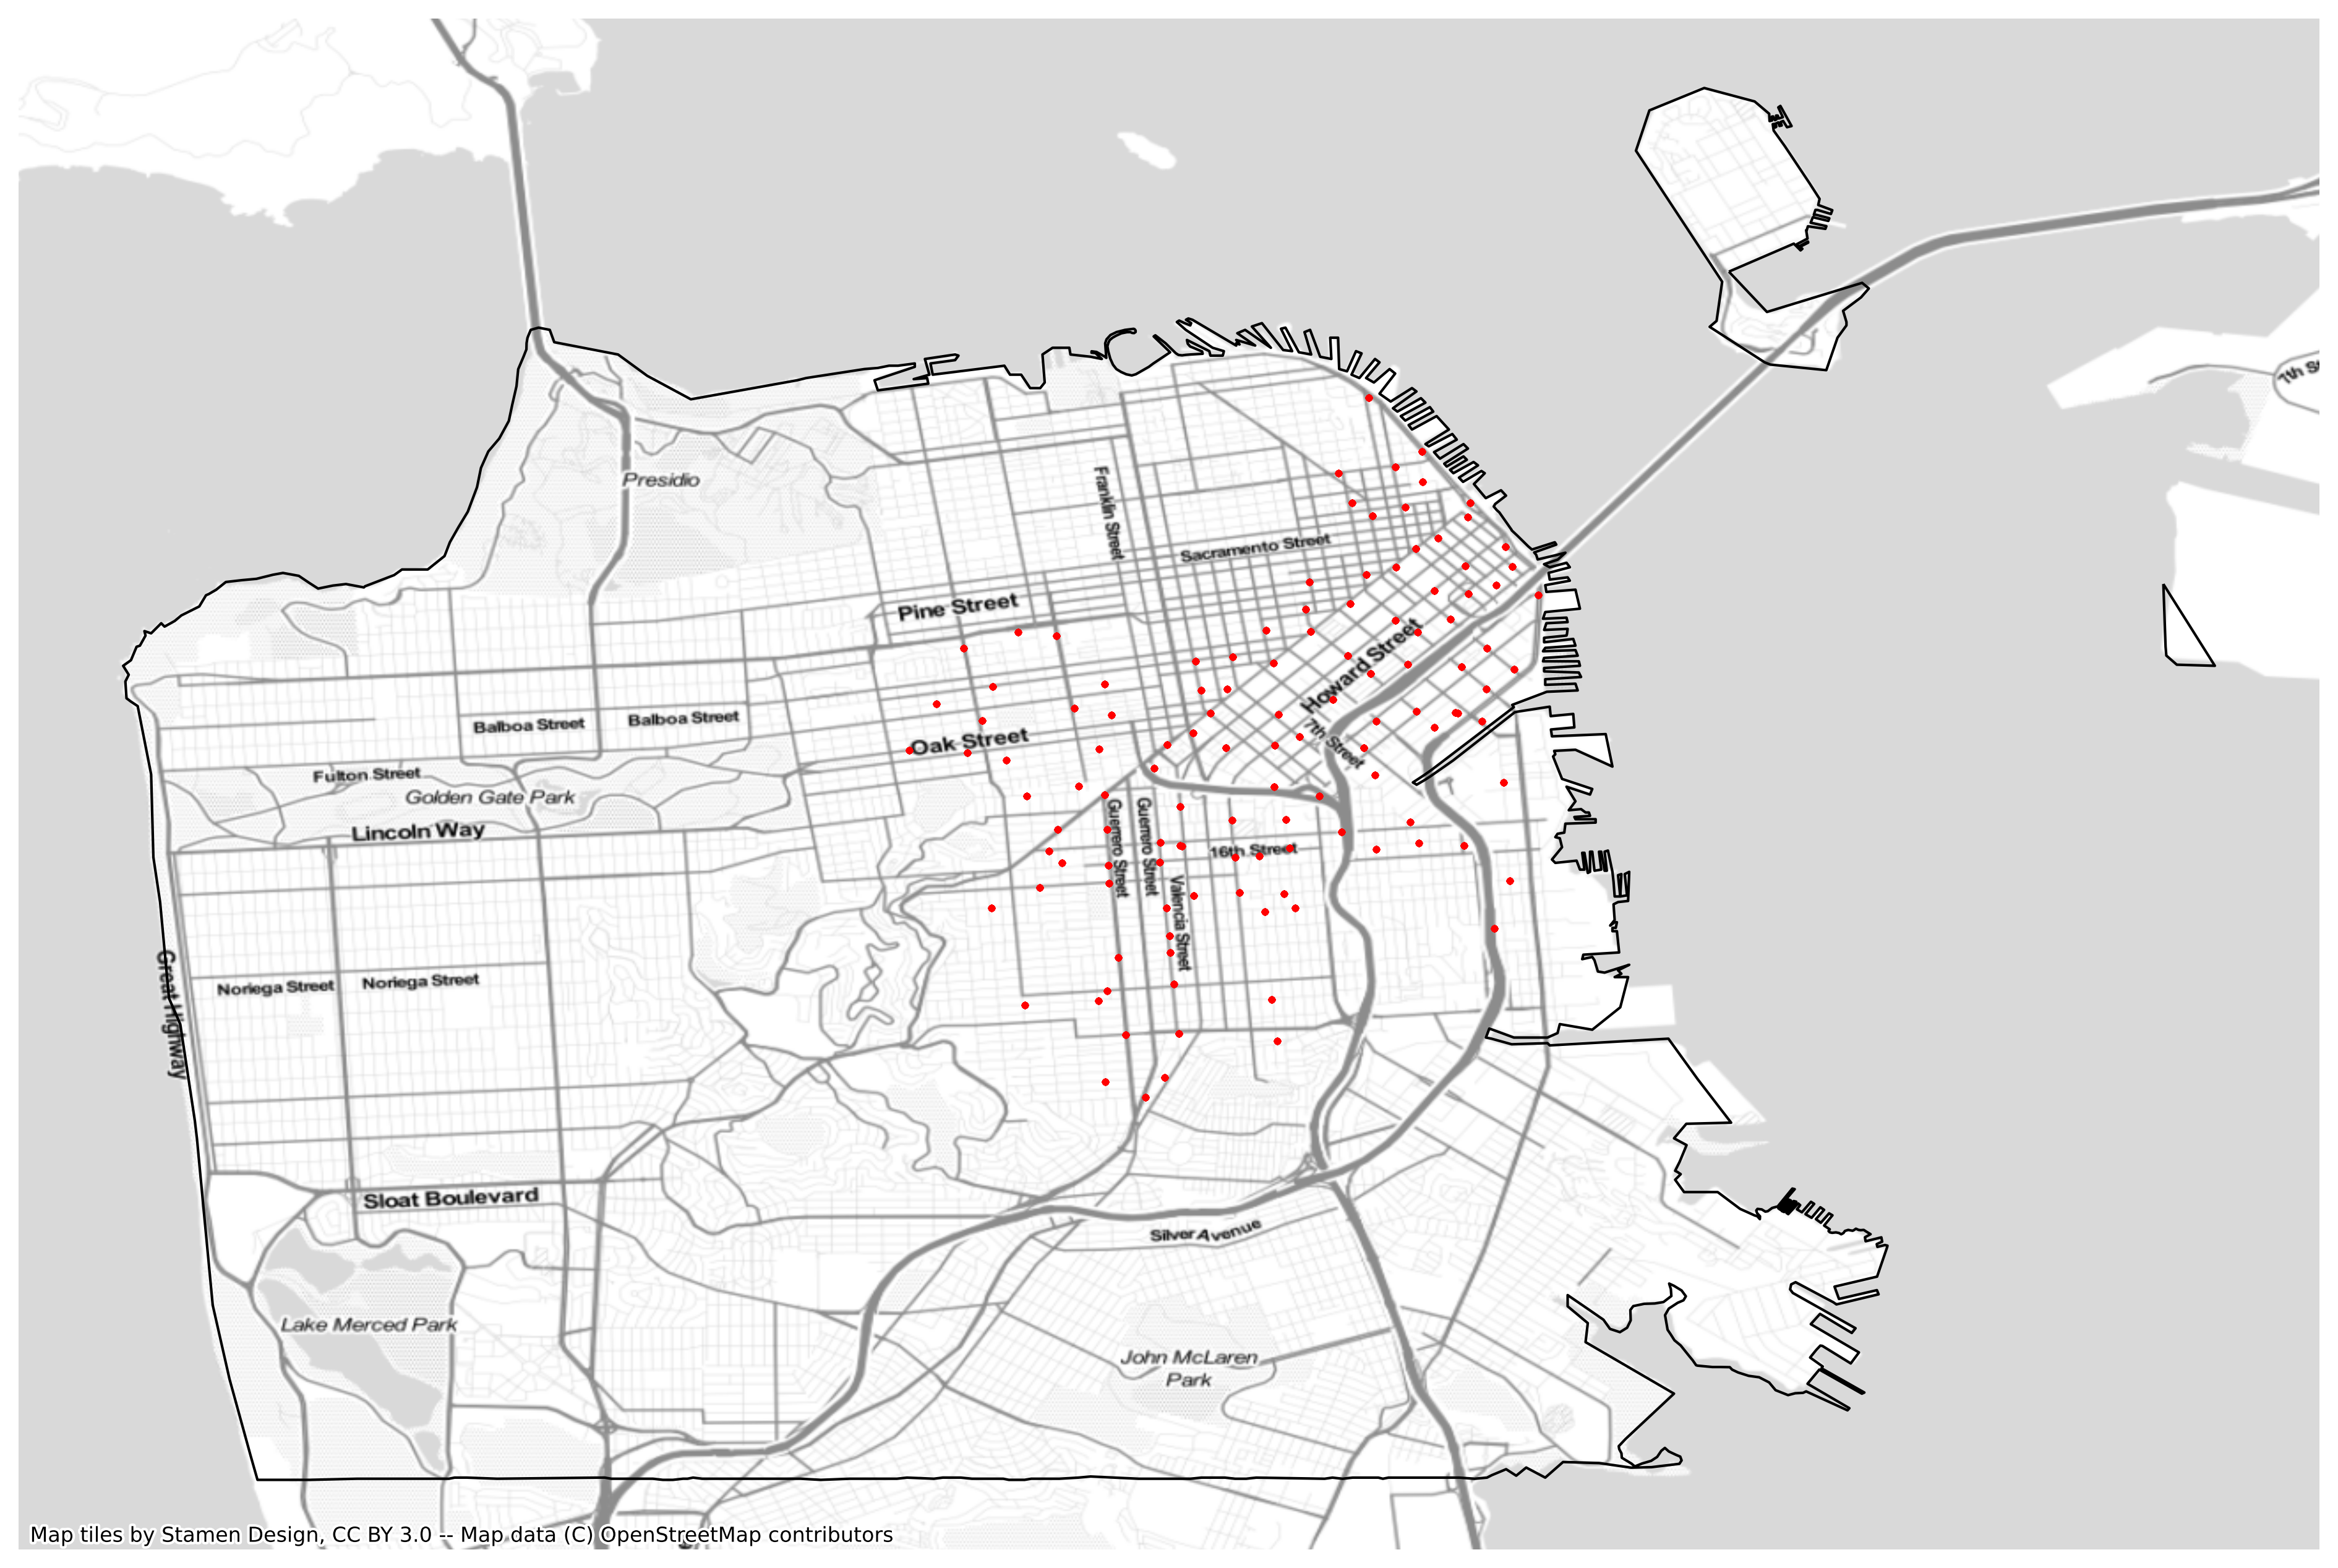

In [19]:
fig, ax = plt.subplots(dpi=300, figsize=(16,16))
ax.set_axis_off()
city_shape.to_crs('epsg:4326').plot(ax=ax, facecolor='none', edgecolor='black')
sf_stations.plot(ax=ax, color='red', markersize=3.0)
cx.add_basemap(ax, crs=sf_stations.crs.to_string(), source=cx.providers.Stamen.TonerLite)
#add_scalebar(ax, 1000, color='k')
plt.savefig('station_locations.png', bbox_inches='tight')

In [20]:
station_demand = sf_stations.groupby(by=['start_station_id', 'end_station_id']).size().reset_index().rename(columns={0:'count'})

In [21]:
trip_counts = station_demand['count'].values

In [364]:
np.log10(np.sum(trip_counts))

5.614184050533917

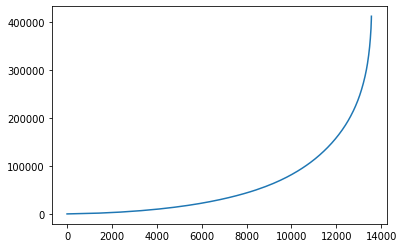

In [367]:
plt.plot(np.cumsum(np.sort(trip_counts)))

In [363]:
len(np.where(np.cumsum(np.sort(trip_counts))<(0.5*np.sum(trip_counts)))[0]) * 100 / float(np.sum(trip_counts))

3.079810562962531

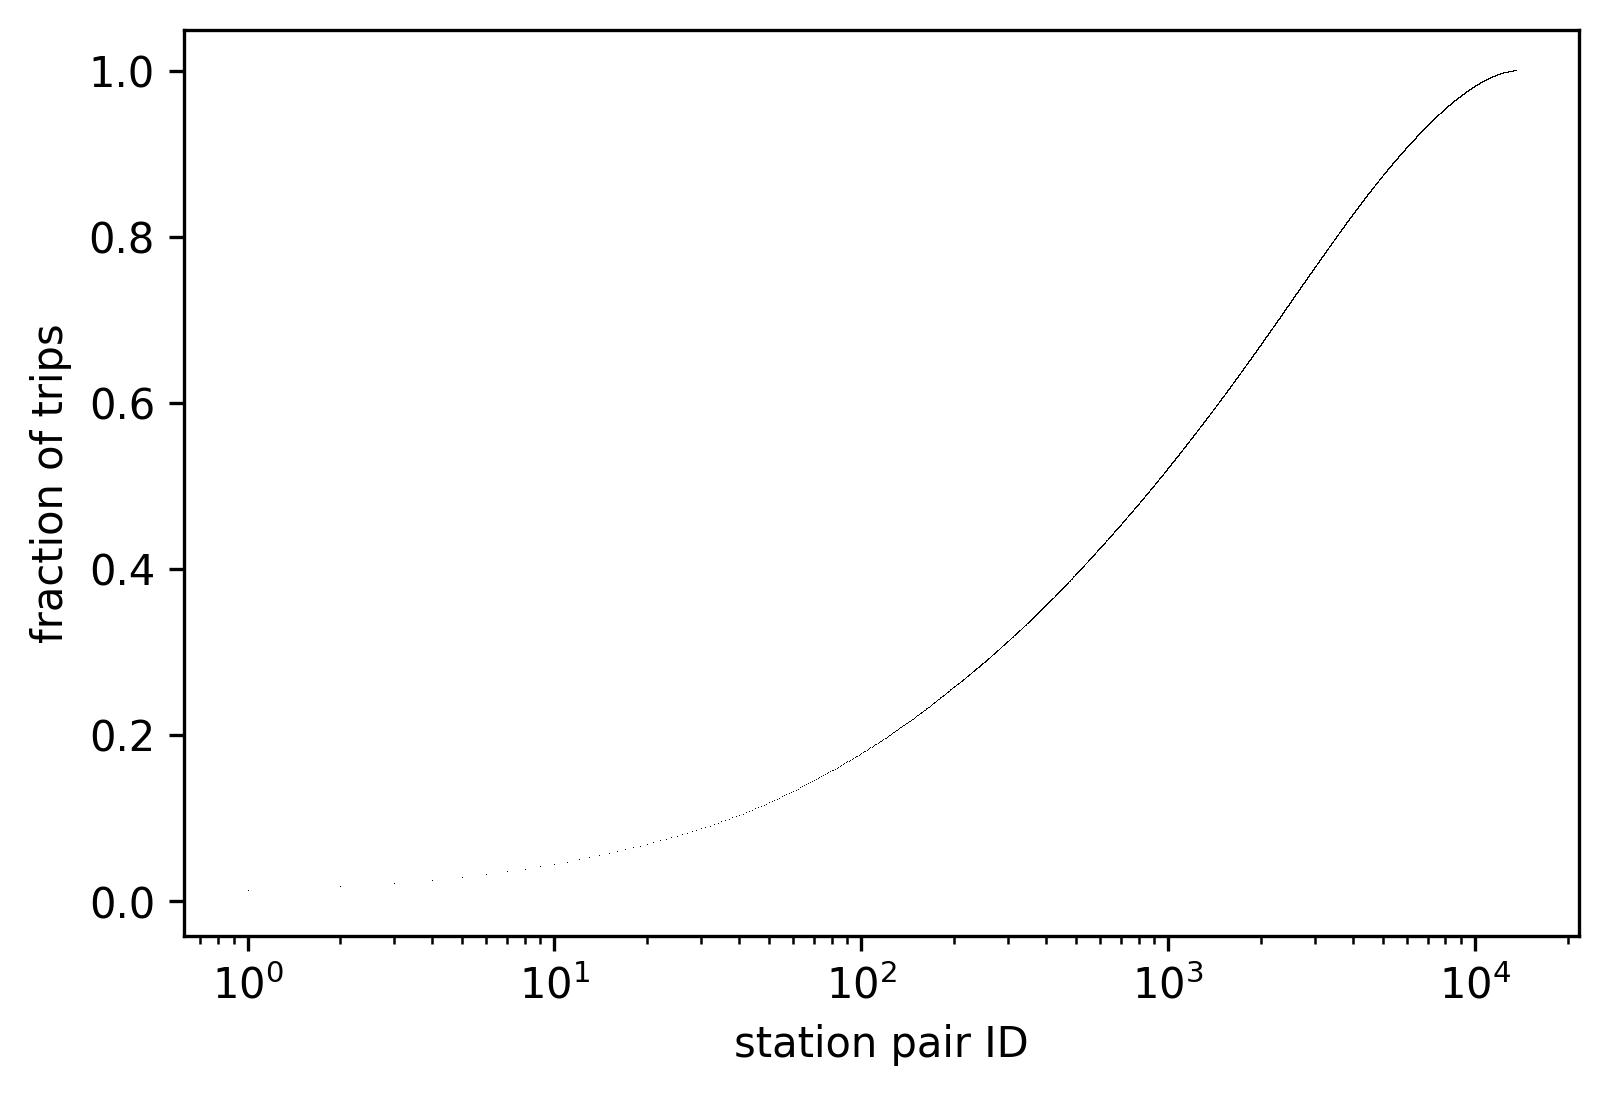

In [22]:
plt.figure(dpi=300)
plt.plot(np.cumsum(-np.sort(-trip_counts)) / np.sum(trip_counts), 'k,')
plt.xlabel('station pair ID')
plt.ylabel('fraction of trips')
plt.xscale('log')
plt.savefig('pairID_cumsum.png', bbox_inches='tight')

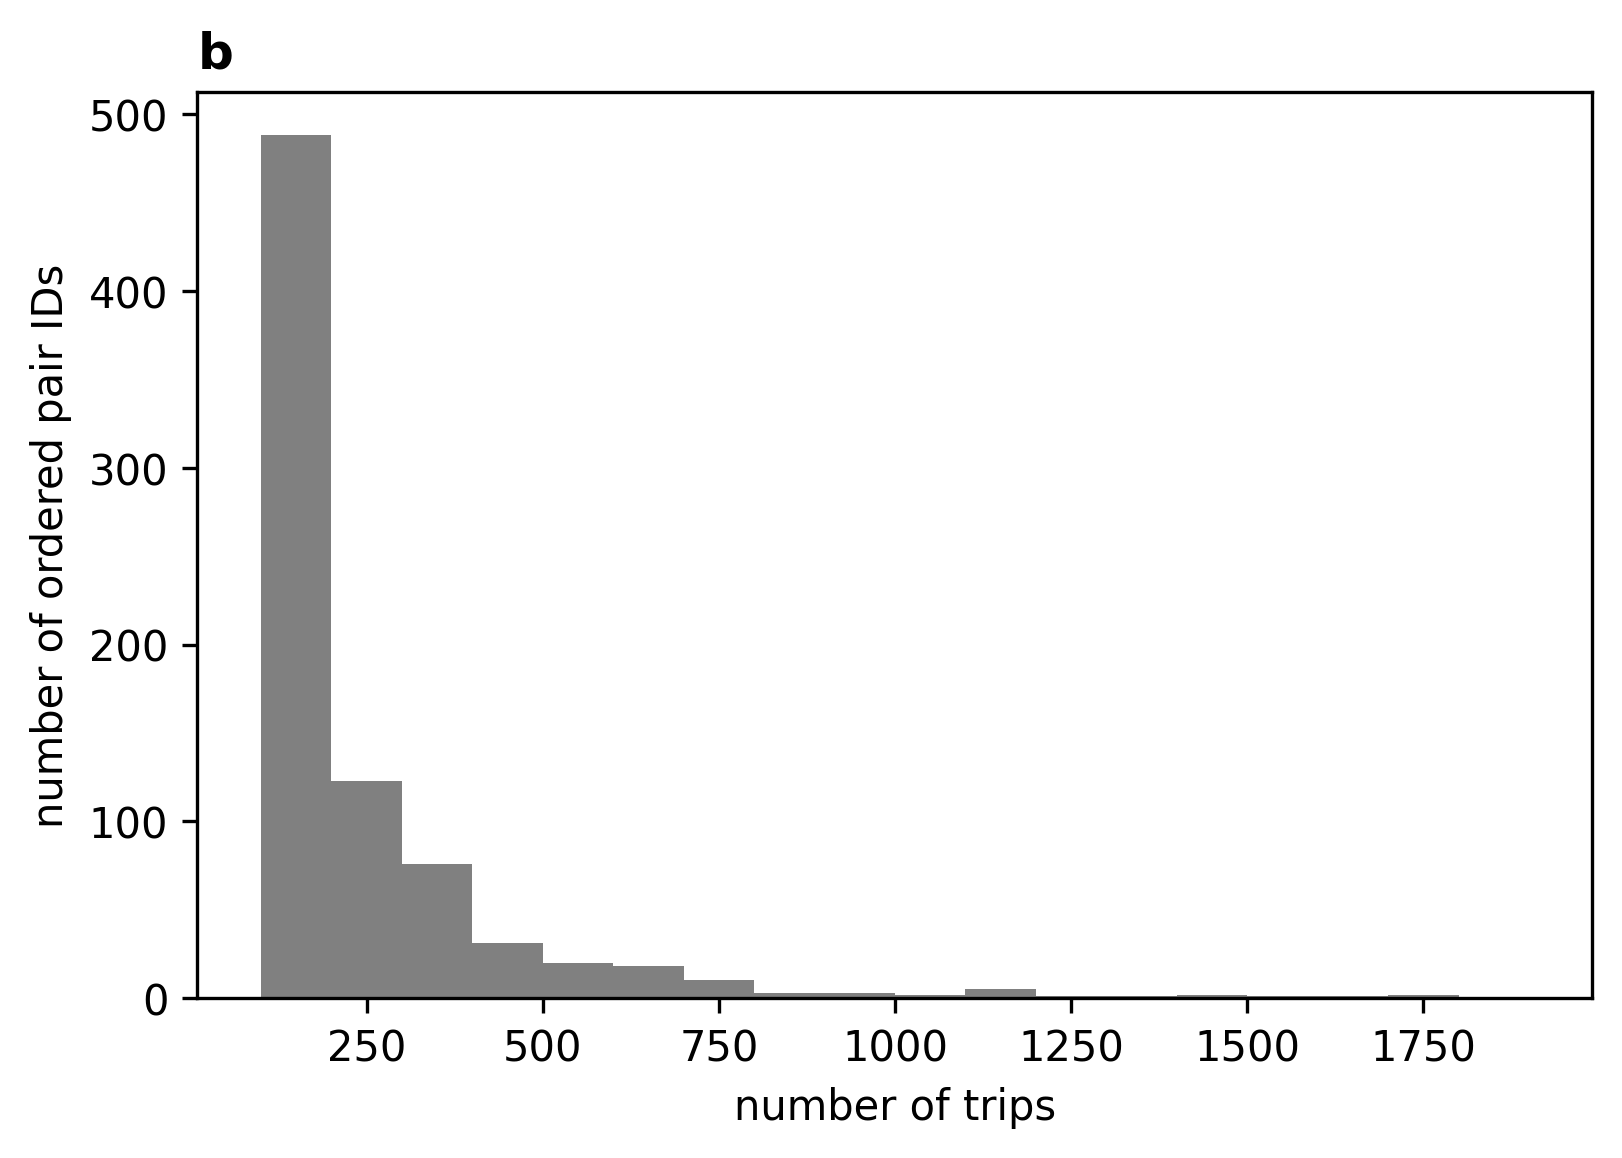

In [314]:
plt.figure(dpi=300)
plt.hist(trip_counts, bins=np.arange(100,2000,100), color='grey')#[0,1,5,10,50,100,500,1000,5000])
plt.ylabel('number of ordered pair IDs')
plt.xlabel('number of trips')
plt.title('b', loc='left', fontweight='bold')
plt.savefig('trip_hist_100-2000.png', bbox_inches='tight')

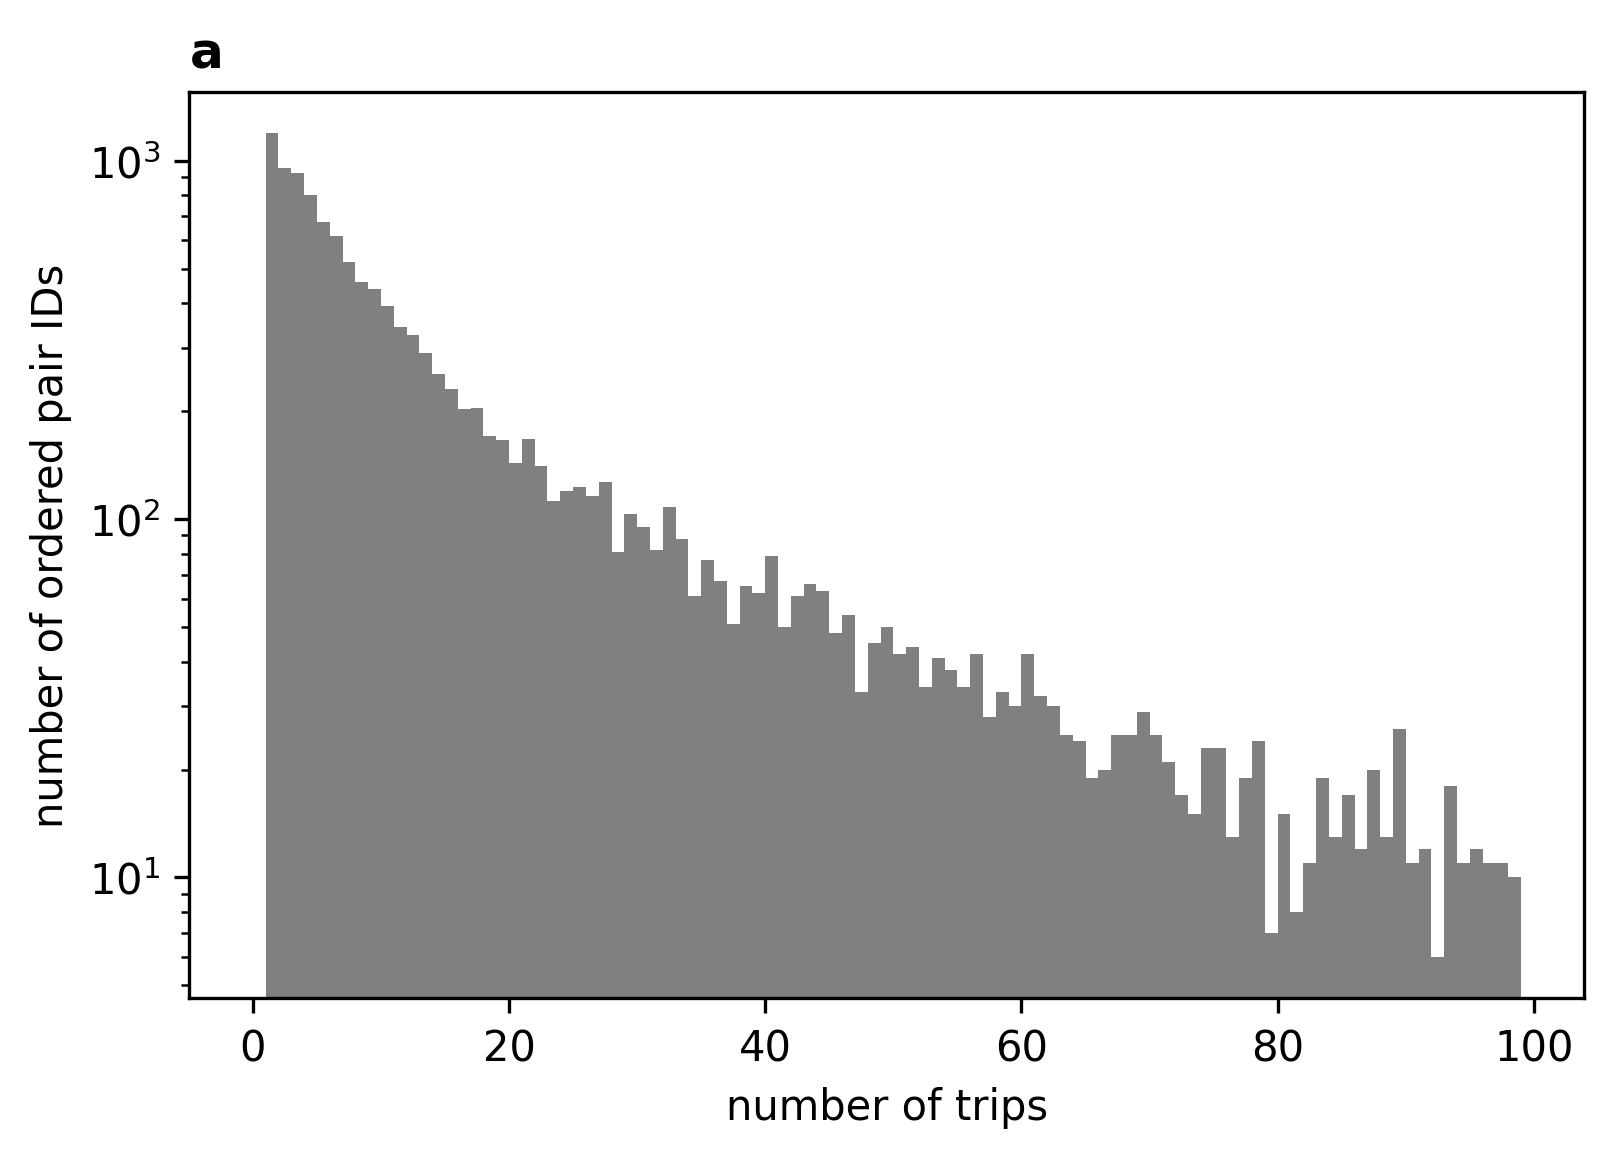

In [315]:
plt.figure(dpi=300)
plt.hist(trip_counts, bins=np.arange(0,100,1), color='grey')
plt.yscale('log')
#plt.xscale('log')
plt.ylabel('number of ordered pair IDs')
plt.xlabel('number of trips')
plt.title('a', loc='left', fontweight='bold')
plt.savefig('trip_hist_0-100.png', bbox_inches='tight')

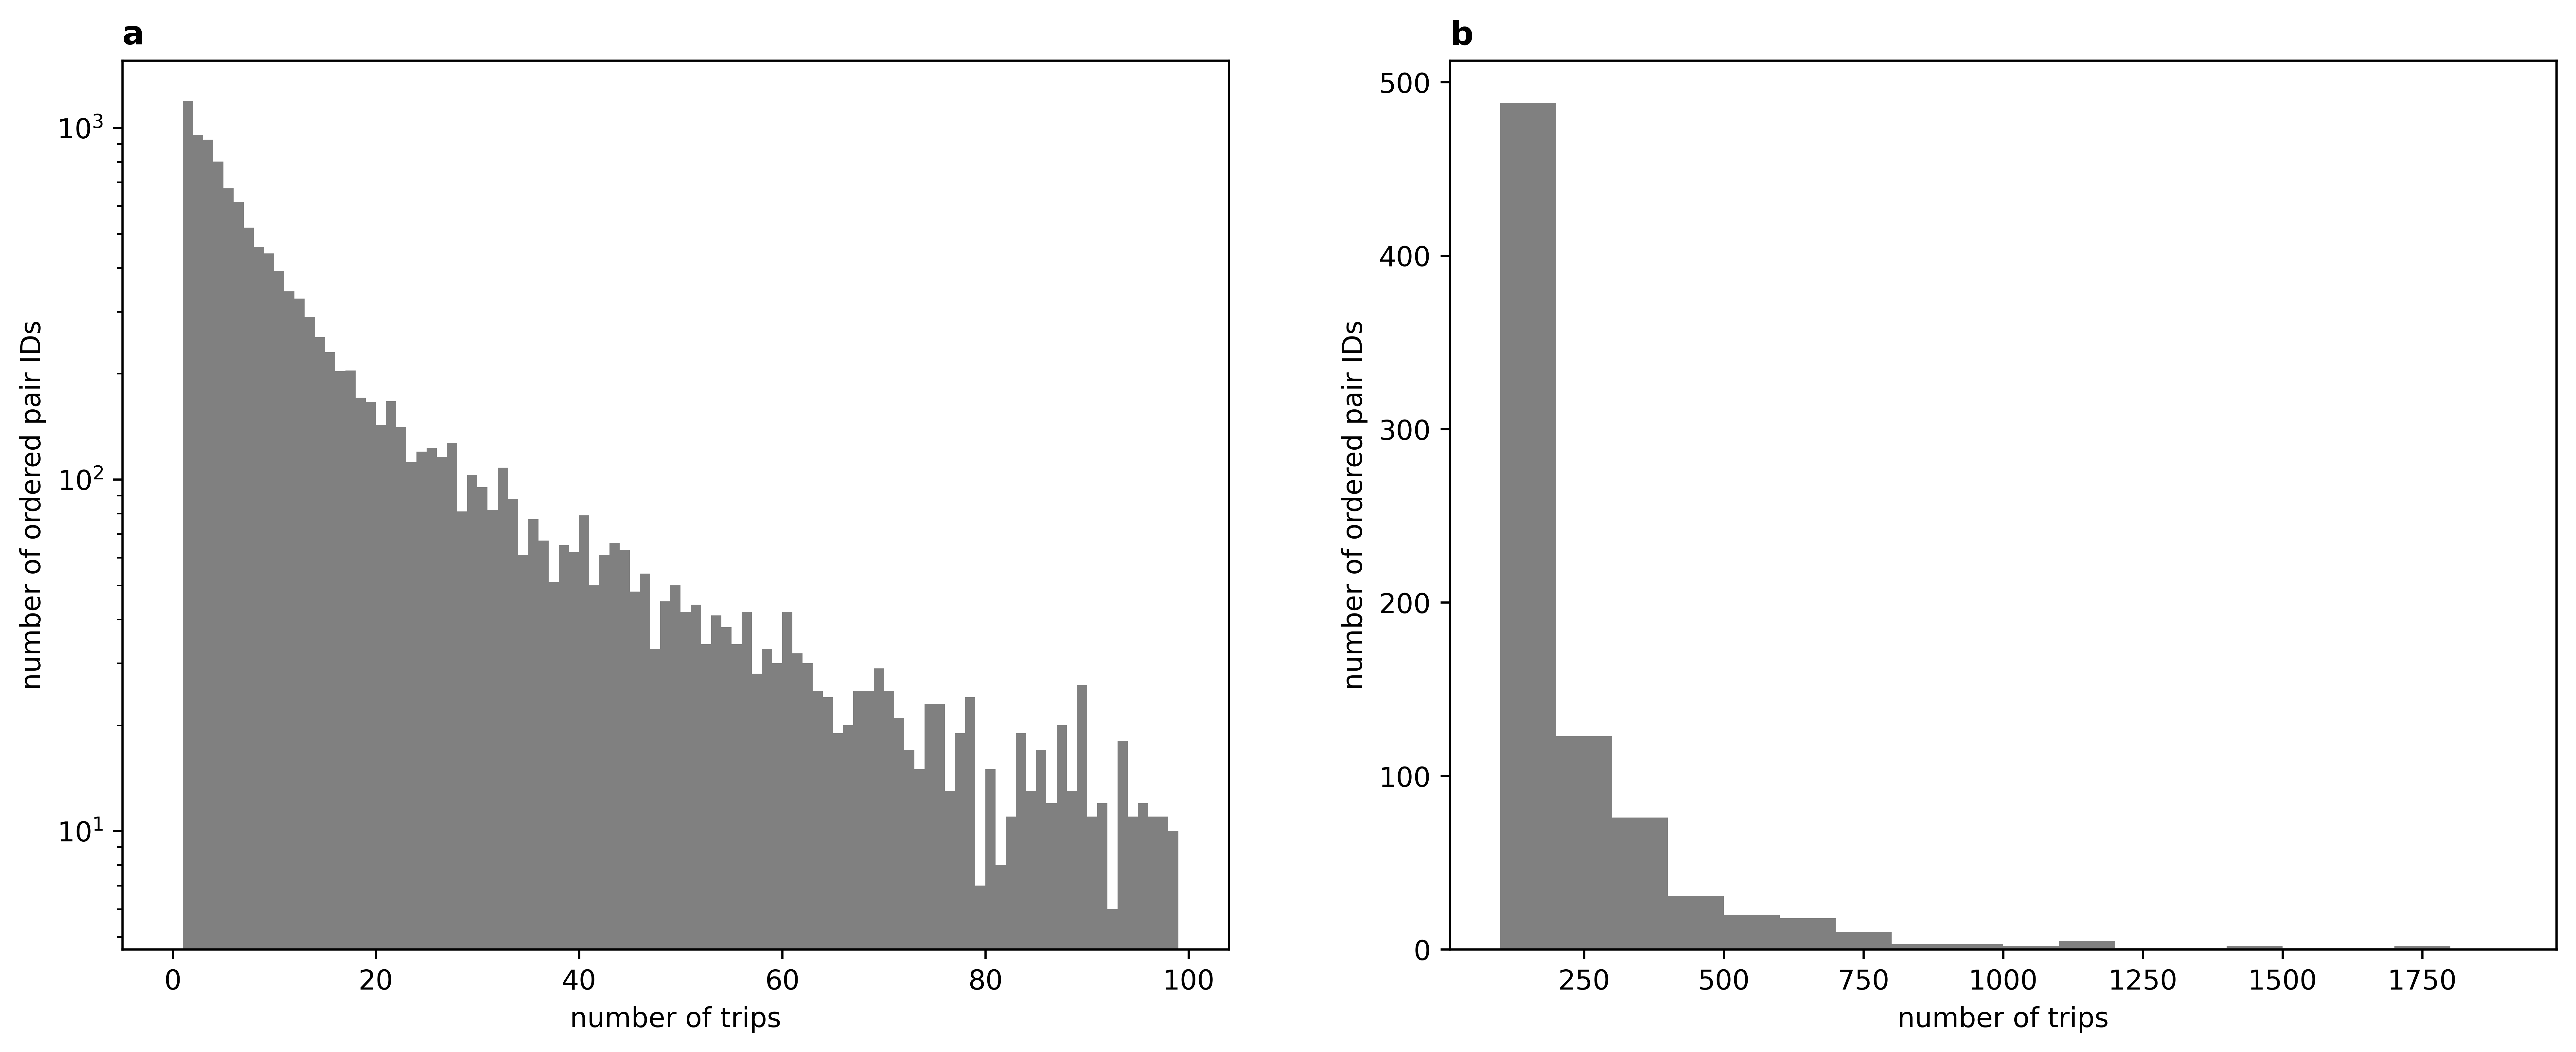

In [370]:
plt.figure(dpi=600, figsize=(16,6))

plt.subplot(121)
plt.hist(trip_counts, bins=np.arange(0,100,1), color='grey')
plt.yscale('log')
#plt.xscale('log')
plt.ylabel('number of ordered pair IDs')
plt.xlabel('number of trips')
plt.title('a', loc='left', fontweight='bold')

plt.subplot(122)
plt.hist(trip_counts, bins=np.arange(100,2000,100), color='grey')#[0,1,5,10,50,100,500,1000,5000])
plt.ylabel('number of ordered pair IDs')
plt.xlabel('number of trips')
plt.title('b', loc='left', fontweight='bold')

plt.savefig('combined_trip_hist.png', bbox_inches='tight')

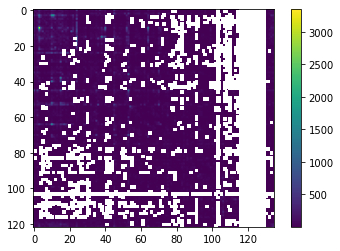

In [26]:
B = station_demand.pivot(index='start_station_id', columns='end_station_id', values='count')
#plt.hist2d(station_demand.start_station_id.values, station_demand.end_station_id.values, weights= station_demand.count, density=False,bins=np.arange(3,400,1))
#plt.xlabel('start station ID')
#plt.ylabel('end station ID')
#plt.colorbar()
plt.imshow(B.values)
plt.colorbar()

In [27]:
n=325
count_station_pairs = np.zeros([n,n])

for i in np.arange(n):
    for j in np.arange(n):
        try:
            start_query  = (station_demand.start_station_id == i)
            end_query = (station_demand.end_station_id == j)
            count_station_pairs[i,j] = station_demand[start_query&end_query]['count'].sum()
            #print('hello')
        except:
            #print(station_demand[start_query&end_query]['count'].sum())
            pass

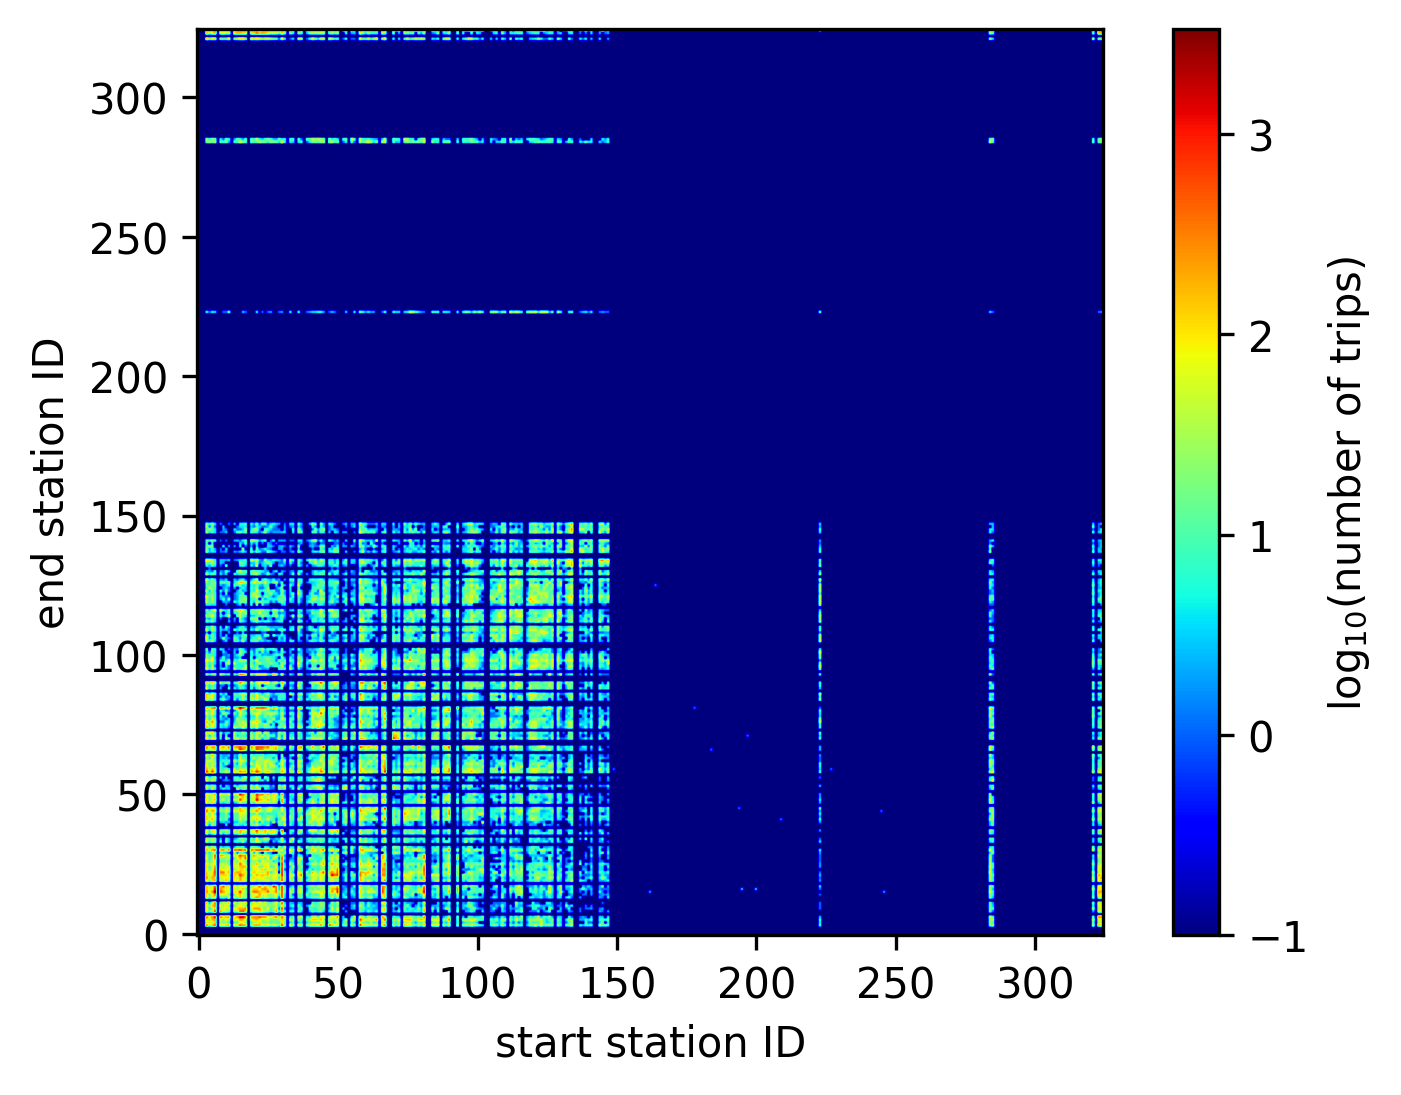

In [351]:
plt.figure(dpi=300)
plt.imshow(np.log10(count_station_pairs+1e-1), origin='lower', cmap='jet')
plt.xlabel('start station ID')
plt.ylabel('end station ID')
plt.colorbar(label = r'$\log_{10}$(number of trips)')
plt.savefig('OD_matrix.png', bbox_inches='tight')

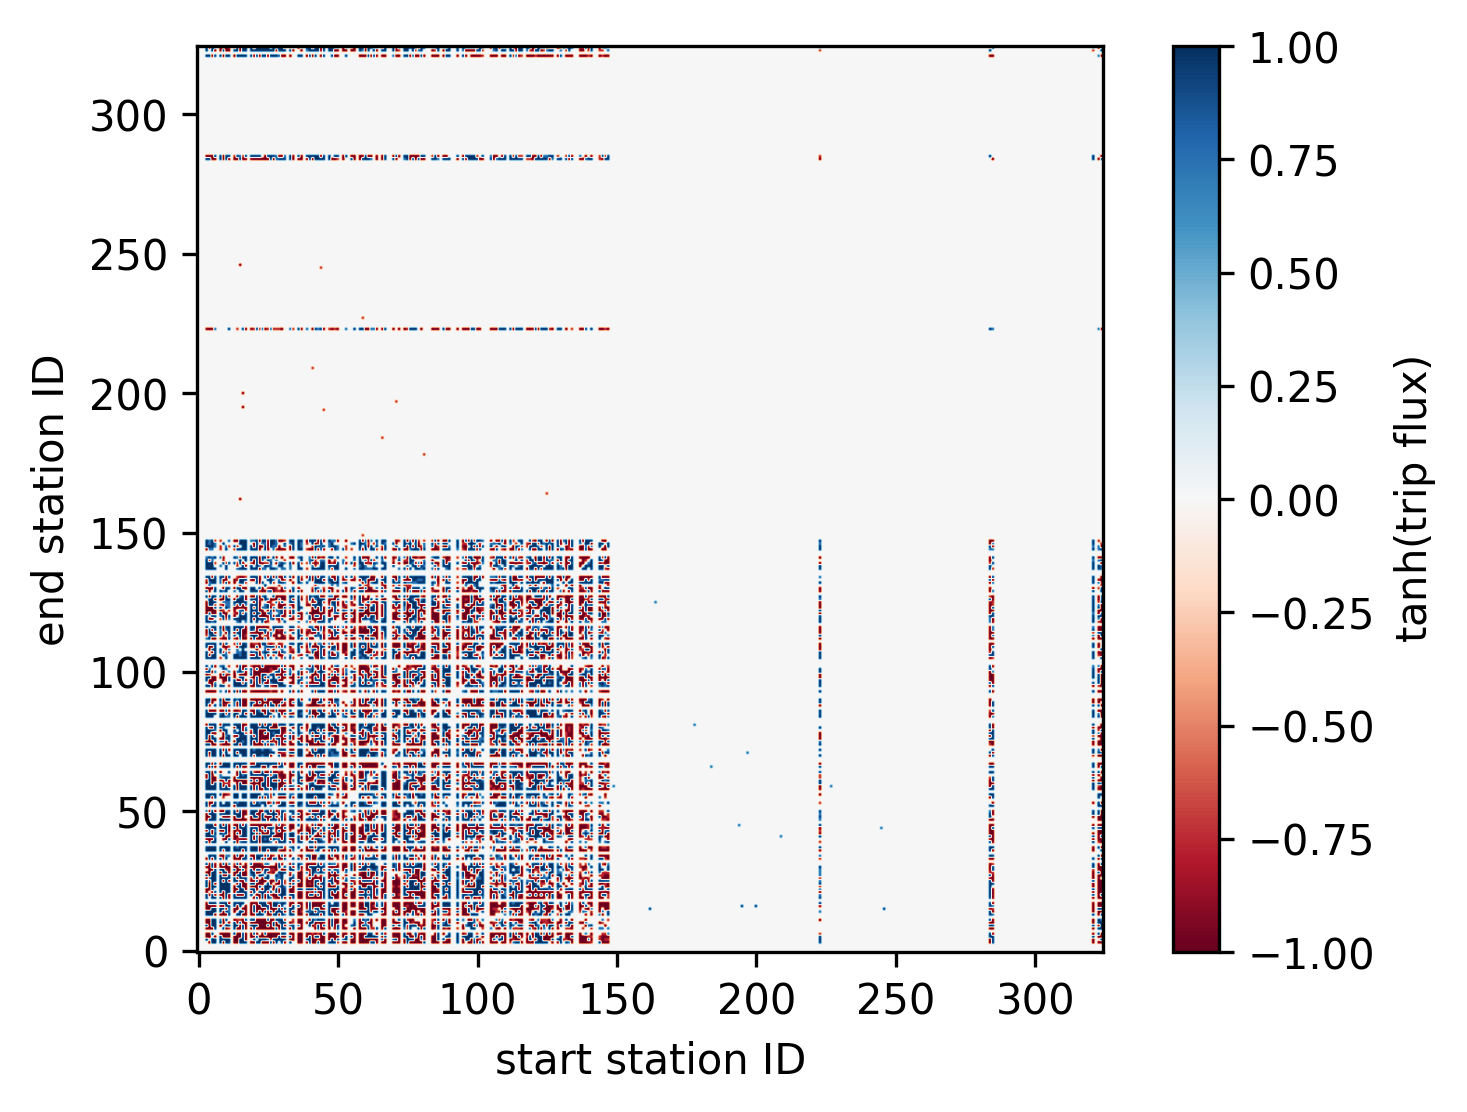

In [350]:
plt.figure(dpi=300)
plt.imshow(np.tanh(count_station_pairs - count_station_pairs.T), origin='lower', cmap='RdBu')
plt.xlabel('start station ID')
plt.ylabel('end station ID')
plt.colorbar(label = r'$\tanh$(trip flux)')
plt.savefig('OD_flux.png', bbox_inches='tight')

In [30]:
flux = count_station_pairs - count_station_pairs.T
np.where(flux>500)

(array([15, 21, 22, 58]), array([ 6, 30, 30, 67]))

In [316]:
np.sum(count_station_pairs - count_station_pairs.T)

0.0

In [31]:
sf_stations[sf_stations['start_station_id'] == 58]

duration_sec                start_time                  end_time  \
57               490  2017-12-31 23:05:28.9190  2017-12-31 23:13:39.4890   
247              883  2017-12-31 18:51:00.9400  2017-12-31 19:05:44.6940   
306             2137  2017-12-31 17:27:38.9070  2017-12-31 18:03:16.5500   
307             2112  2017-12-31 17:27:56.3130  2017-12-31 18:03:08.9350   
434              447  2017-12-31 16:39:44.8740  2017-12-31 16:47:12.7810   
...              ...                       ...                       ...   
519573          1805  2017-06-28 12:37:52.3030  2017-06-28 13:07:57.7060   
519574          1798  2017-06-28 12:37:57.1800  2017-06-28 13:07:55.4250   
519576           726  2017-06-28 12:54:51.8700  2017-06-28 13:06:58.8180   
519578           774  2017-06-28 12:54:02.1880  2017-06-28 13:06:56.4890   
519698           366  2017-06-28 09:47:41.6640  2017-06-28 09:53:47.7150   

        start_station_id    start_station_name  start_station_latitude  \
57                    58  Market St at 10th St               37.776619   
247                   58  Market St at 10th St               37.776619   
306                   58  Market St at 10th St               37.776619   
307                   58  Market St at 10th St               37.776619   
434                   58  Market St at 10th St               37.776619   
...                  ...                   ...                     ...   
519573                58  Market St at 10th St               37.776619   
519574                58  Market St at 10th St               37.776619   
519576                58  Market St at 10th St               37.776619   
519578                58  Market St at 10th St               37.776619   
519698                58  Market St at 10th St               37.776619   

        start_station_longitude  end_station_id  \
57                  -122.417385              56   
247                 -122.417385              15   
306                 -122.417385              23   
307                 -122.417385              23   
434                 -122.417385              89   
...                         ...             ...   
519573              -122.417385               6   
519574              -122.417385               6   
519576              -122.417385              21   
519578              -122.417385             324   
519698              -122.417385              59   

                                         end_station_name  \
57                                          Koshland Park   
247     San Francisco Ferry Building (Harry Bridges Pl...   
306                         The Embarcadero at Steuart St   
307                         The Embarcadero at Steuart St   
434                            Division St at Potrero Ave   
...                                                   ...   
519573                      The Embarcadero at Sansome St   
519574                      The Embarcadero at Sansome St   
519576   Montgomery St BART Station (Market St at 2nd St)   
519578                Union Square (Powell St at Post St)   
519698                        S Van Ness Ave at Market St   

        end_station_latitude  end_station_longitude  bike_id   user_type  \
57                 37.773414            -122.427317     2738    Customer   
247                37.795392            -122.394203     1746  Subscriber   
306                37.791464            -122.391034      396  Subscriber   
307                37.791464            -122.391034     3452  Subscriber   
434                37.769218            -122.407646     1590  Subscriber   
...                      ...                    ...      ...         ...   
519573             37.804770            -122.403234      601    Customer   
519574             37.804770            -122.403234      855    Customer   
519576             37.789625            -122.400811      737  Subscriber   
519578             37.788300            -122.408531       25  Subscriber   
519698             37.77

In [32]:
sf_stations['start_time'] = pd.to_datetime(sf_stations.start_time)

/home/kbartilad/.conda-envs/new_envi/lib/python3.6/site-packages/geopandas/geodataframe.py:1322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


In [33]:
sf_stations.start_time.dt.hour

0         16
1         15
3         17
5         22
7         23
          ..
519695    10
519696     9
519697     9
519698     9
519699     9
Name: start_time, Length: 411324, dtype: int64

In [34]:
hourly_trip_counts = sf_stations.groupby(by=[sf_stations.start_time.dt.hour, 'start_station_id', 'end_station_id']).size().reset_index().rename(columns={0:'count'})

In [35]:
hourly_activity = hourly_trip_counts.groupby(by='start_time').sum()

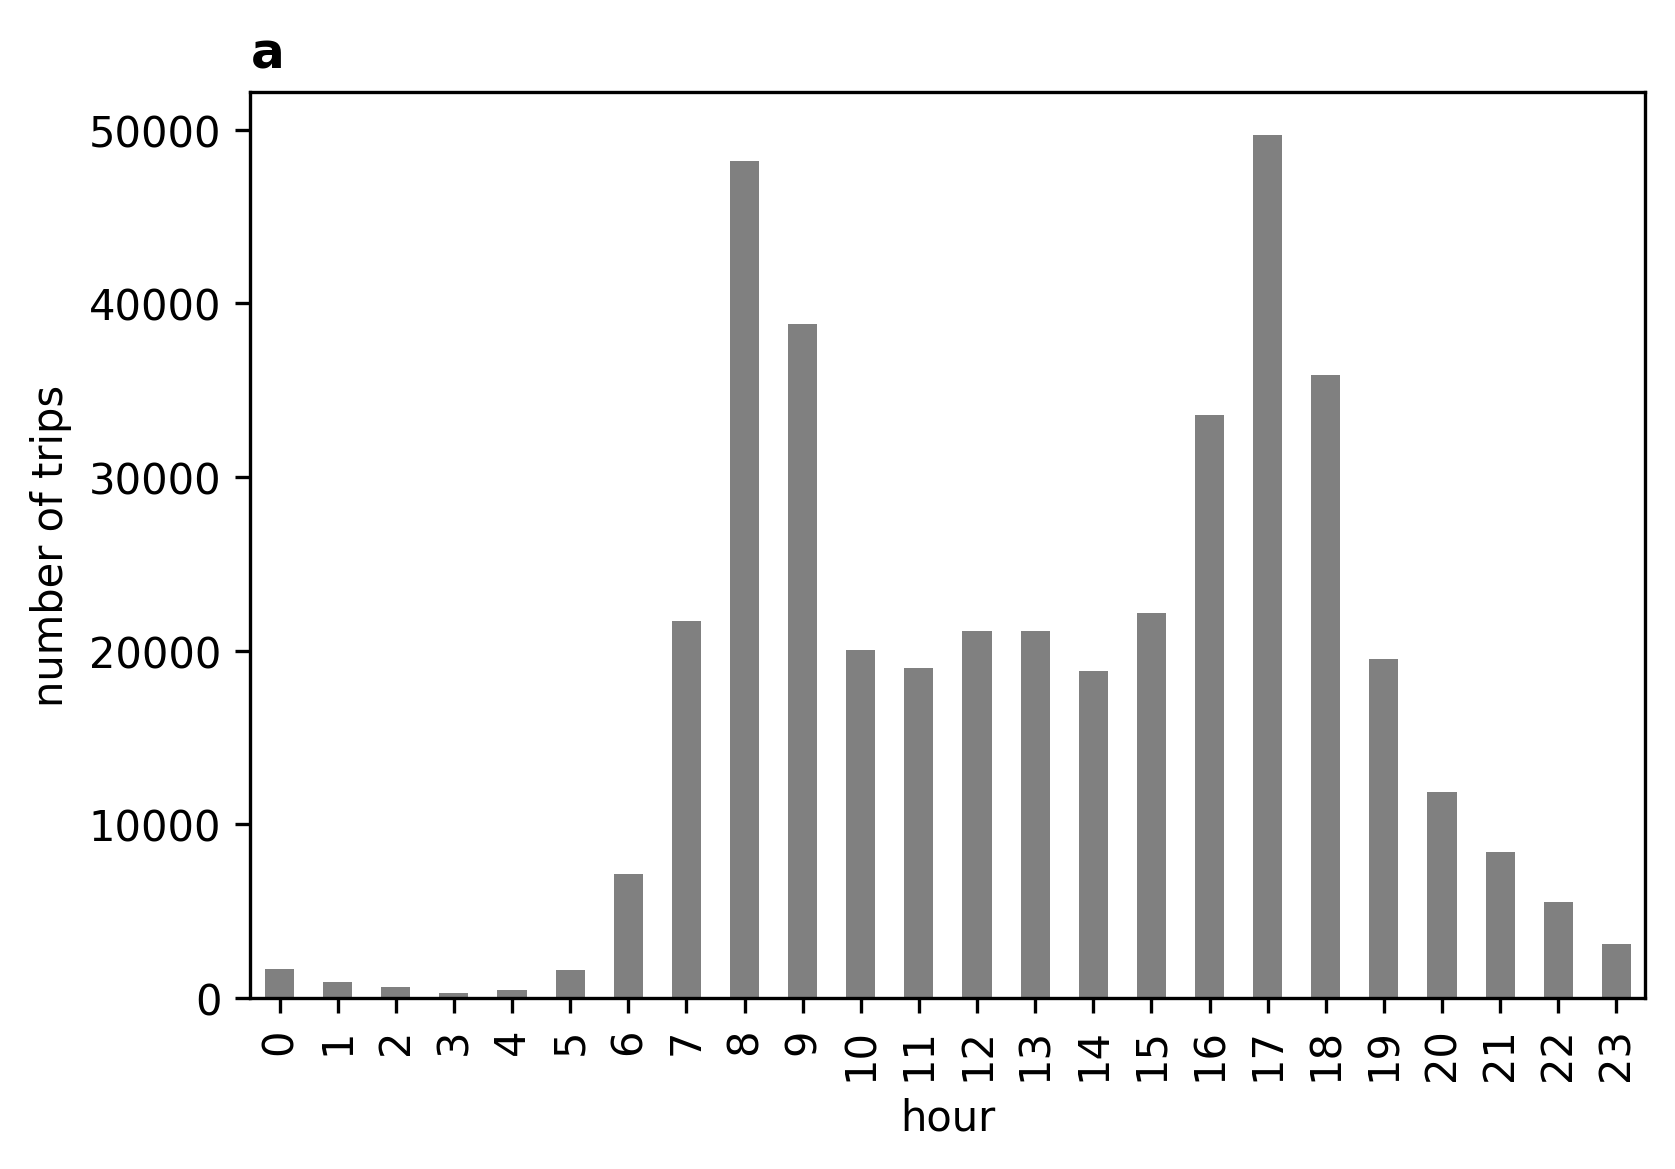

In [313]:
plt.figure(dpi=300)
hourly_activity['count'].plot(kind='bar', xlabel='hour', ylabel='number of trips', color='grey')
plt.title('a', loc='left', fontweight='bold')
plt.savefig('hourly_activity.png', bbox_inches='tight')

In [37]:
daily_trip_counts = sf_stations.groupby(by=[sf_stations.start_time.dt.dayofweek, 'start_station_id', 'end_station_id']).size().reset_index().rename(columns={0:'count'})

In [38]:
daily_trip_counts.head()

start_time  start_station_id  end_station_id  count
0           0                 3               3     31
1           0                 3               4      8
2           0                 3               5     29
3           0                 3               6     51
4           0                 3               8     24

In [39]:
daily_activity = daily_trip_counts.groupby(by='start_time').sum()

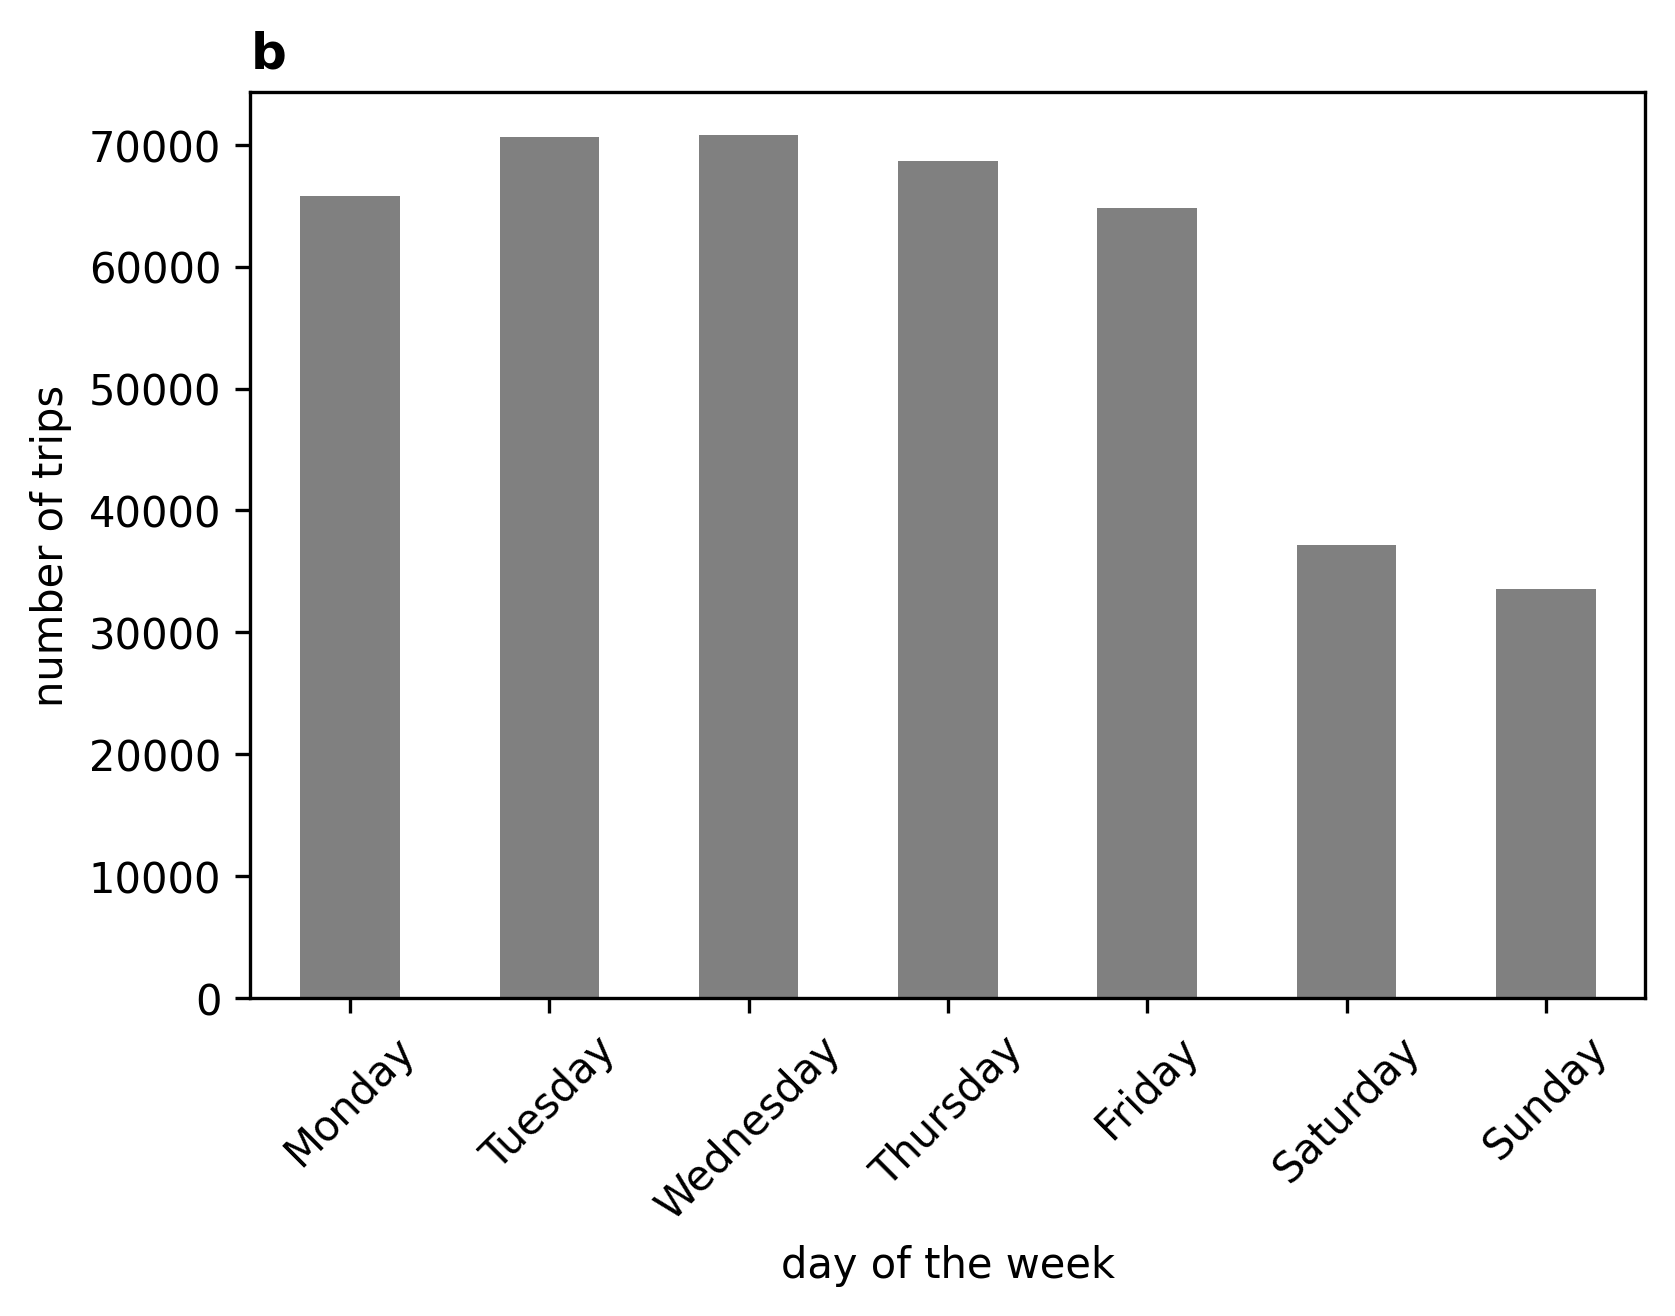

In [312]:
fig, ax = plt.subplots(dpi=300)
#plt.figure(dpi=300)
ax = daily_activity['count'].plot(kind='bar',\
                             xlabel='day of the week',\
                             ylabel='number of trips',\
                             color='grey')
plt.xticks(rotation=45)
ax.set_xticklabels(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('b', loc='left', fontweight='bold')
plt.savefig('daily_activity', bbox_inches='tight')

In [41]:
hourly_trip_counts.head()

start_time  start_station_id  end_station_id  count
0           0                 3               3      3
1           0                 3               4      4
2           0                 3              10      1
3           0                 3              17      1
4           0                 3              21      2

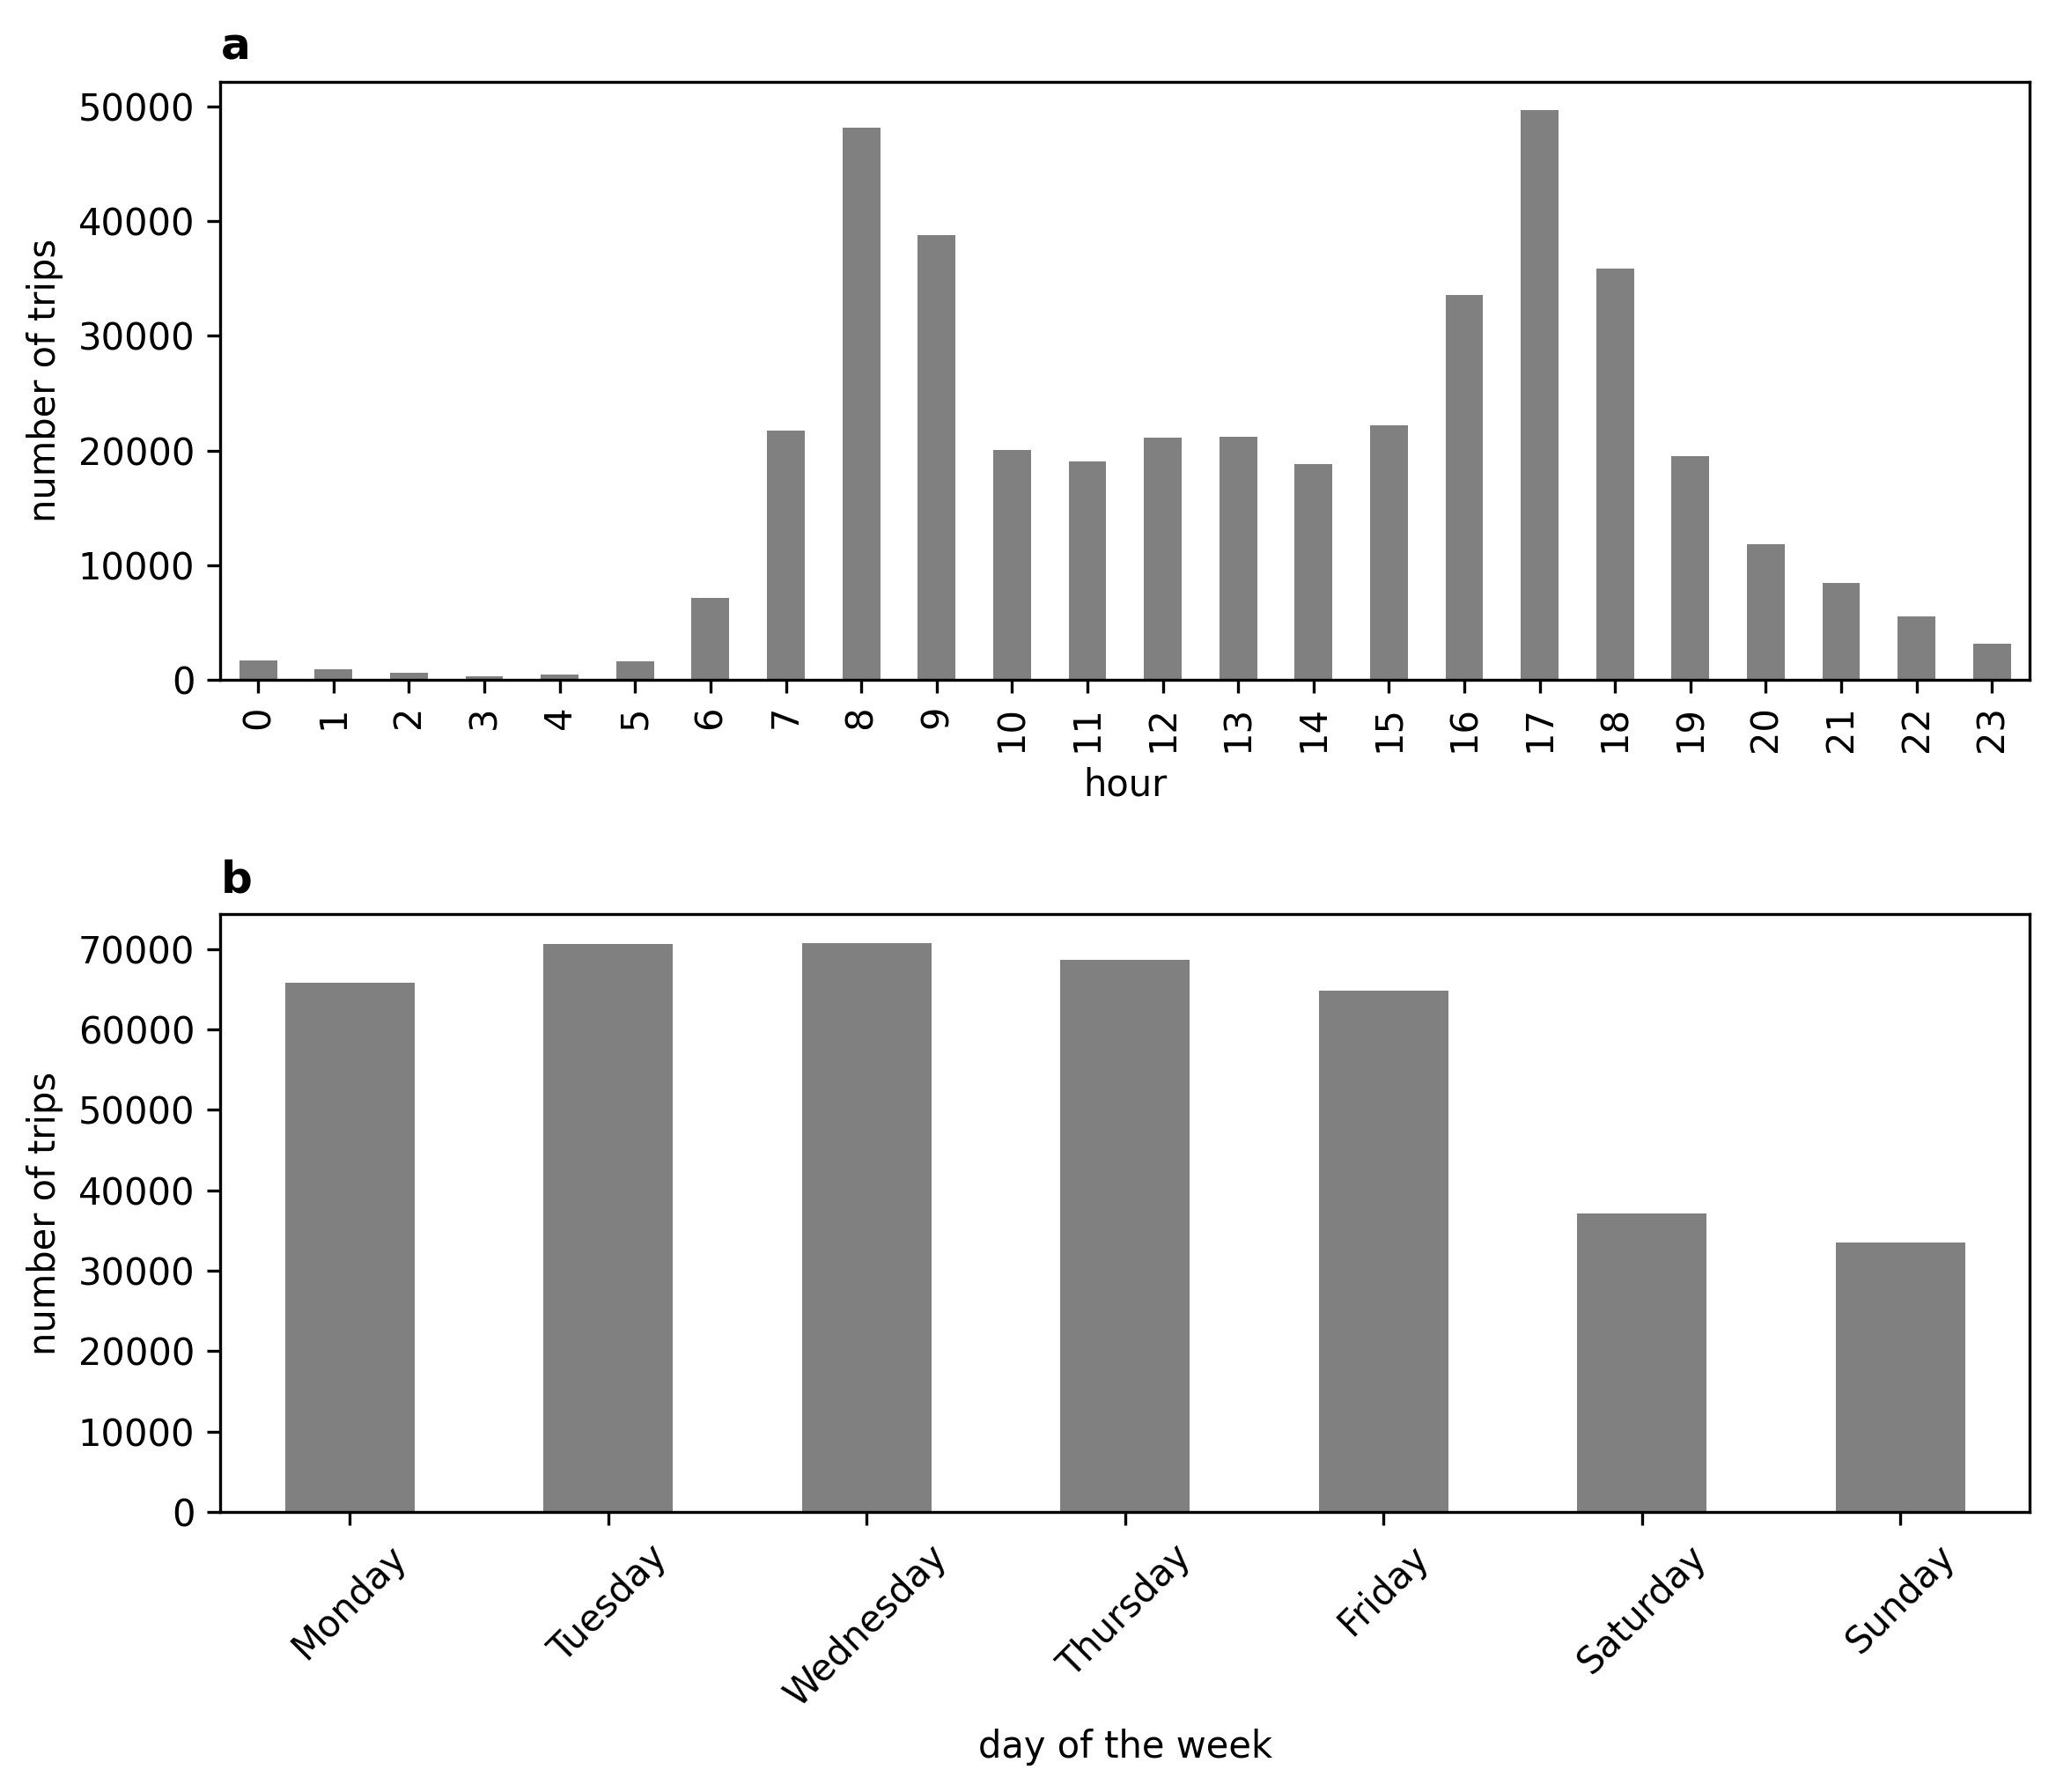

In [311]:
plt.figure(dpi=300, figsize=[8,7])
plt.subplot(211)
hourly_activity['count'].plot(kind='bar', xlabel='hour', ylabel='number of trips', color='grey')
plt.title('a', loc='left', fontweight='bold')

plt.subplot(212)
daily_activity['count'].plot(kind='bar',\
                             xlabel='day of the week',\
                             ylabel='number of trips',\
                             color='grey')
plt.xticks(range(\
                 len(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])), \
           ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], \
           rotation=45)
#plt.xticklabels(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('b', loc='left', fontweight='bold')
plt.tight_layout(pad=1.5)

plt.savefig('temporal_activit.png', bbox_inches='tight')

In [ ]:
fig, axs = plt.subplots

array([[<AxesSubplot:title={'center':'duration_sec'}>]], dtype=object)

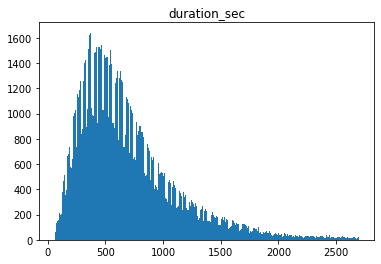

In [53]:
sf_stations[sf_stations['duration_sec']<2700].hist(column='duration_sec', bins=1000, grid=False)

In [74]:
(len(sf_stations)-len(sf_stations[sf_stations['duration_sec']<2700])) / (len(sf_stations)*1.0)

0.037812041116005876

In [71]:
len(sf_stations)

411324

In [150]:
time_pair_dist = sf_stations.groupby(by=['start_station_id', 'end_station_id']).groups

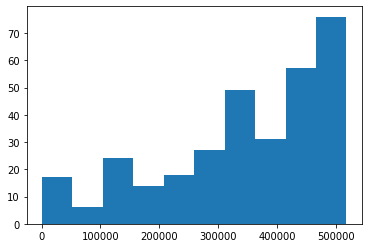

In [79]:
bins = plt.hist(time_pair_dist[(3,3)])

In [60]:
times = list(time_pair_dist.values())
#plt.boxplot(time_pair_dist[0:10])

In [76]:
mean_times = sf_stations.groupby(by=['start_station_id', 'end_station_id'])['duration_sec'].mean()

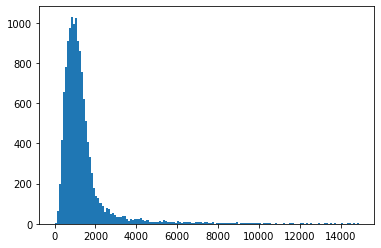

In [83]:
bins = plt.hist(mean_times, bins=np.arange(0,15000,100))

In [97]:
sf_latlong = sf_stations.groupby(by=['start_station_id','start_station_latitude', 'start_station_longitude', 'end_station_id','end_station_latitude', 'end_station_longitude']).size().reset_index().rename(columns={0:'count'})

[]

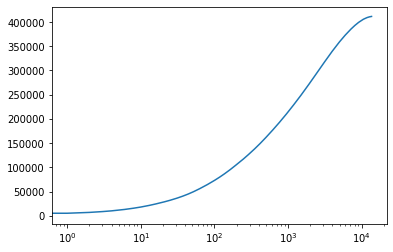

In [108]:
plt.plot(sf_latlong.sort_values(by='count', ascending=False).cumsum()['count'].values)
plt.semilogx()

In [109]:
sf_latlong.head()

start_station_id  start_station_latitude  start_station_longitude  \
0                 3               37.786375              -122.404904   
1                 3               37.786375              -122.404904   
2                 3               37.786375              -122.404904   
3                 3               37.786375              -122.404904   
4                 3               37.786375              -122.404904   

   end_station_id  end_station_latitude  end_station_longitude  count  
0               3             37.786375            -122.404904    319  
1               4             37.785881            -122.408915     32  
2               5             37.783899            -122.408445    176  
3               6             37.804770            -122.403234    485  
4               8             37.799953            -122.398525    130

In [137]:
sf_latlong.to_csv('sf_latlong.csv')

In [142]:
route_distances = pd.read_csv('data/sf_route_distance.csv')

In [145]:
route_distances = route_distances.drop(columns=['Unnamed: 0'])

In [147]:
dist = route_distances['route_distance'].values

In [153]:
route_group = sf_stations.groupby\
(by=['start_station_id','start_station_latitude', 'start_station_longitude', 'end_station_id','end_station_latitude', 'end_station_longitude'])

In [176]:
time_reciprocal = np.reciprocal(sf_stations['duration_sec'].to_numpy(dtype='float64'))

In [179]:
sf_time_dist = sf_stations
sf_time_dist['time_recip'] = time_reciprocal

/home/kbartilad/.conda-envs/new_envi/lib/python3.6/site-packages/geopandas/geodataframe.py:1322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


In [181]:
time_group = sf_time_dist.groupby\
(by=['start_station_id','start_station_latitude', 'start_station_longitude', 'end_station_id','end_station_latitude', 'end_station_longitude'])

In [189]:
recip_sum = time_group['time_recip'].sum().reset_index().rename(columns={0:'summation'})['time_recip'].to_numpy()
mean_speed = np.divide(np.multiply(dist, recip_sum), sf_latlong['count'].to_numpy())

Text(0, 0.5, 'number of routes')

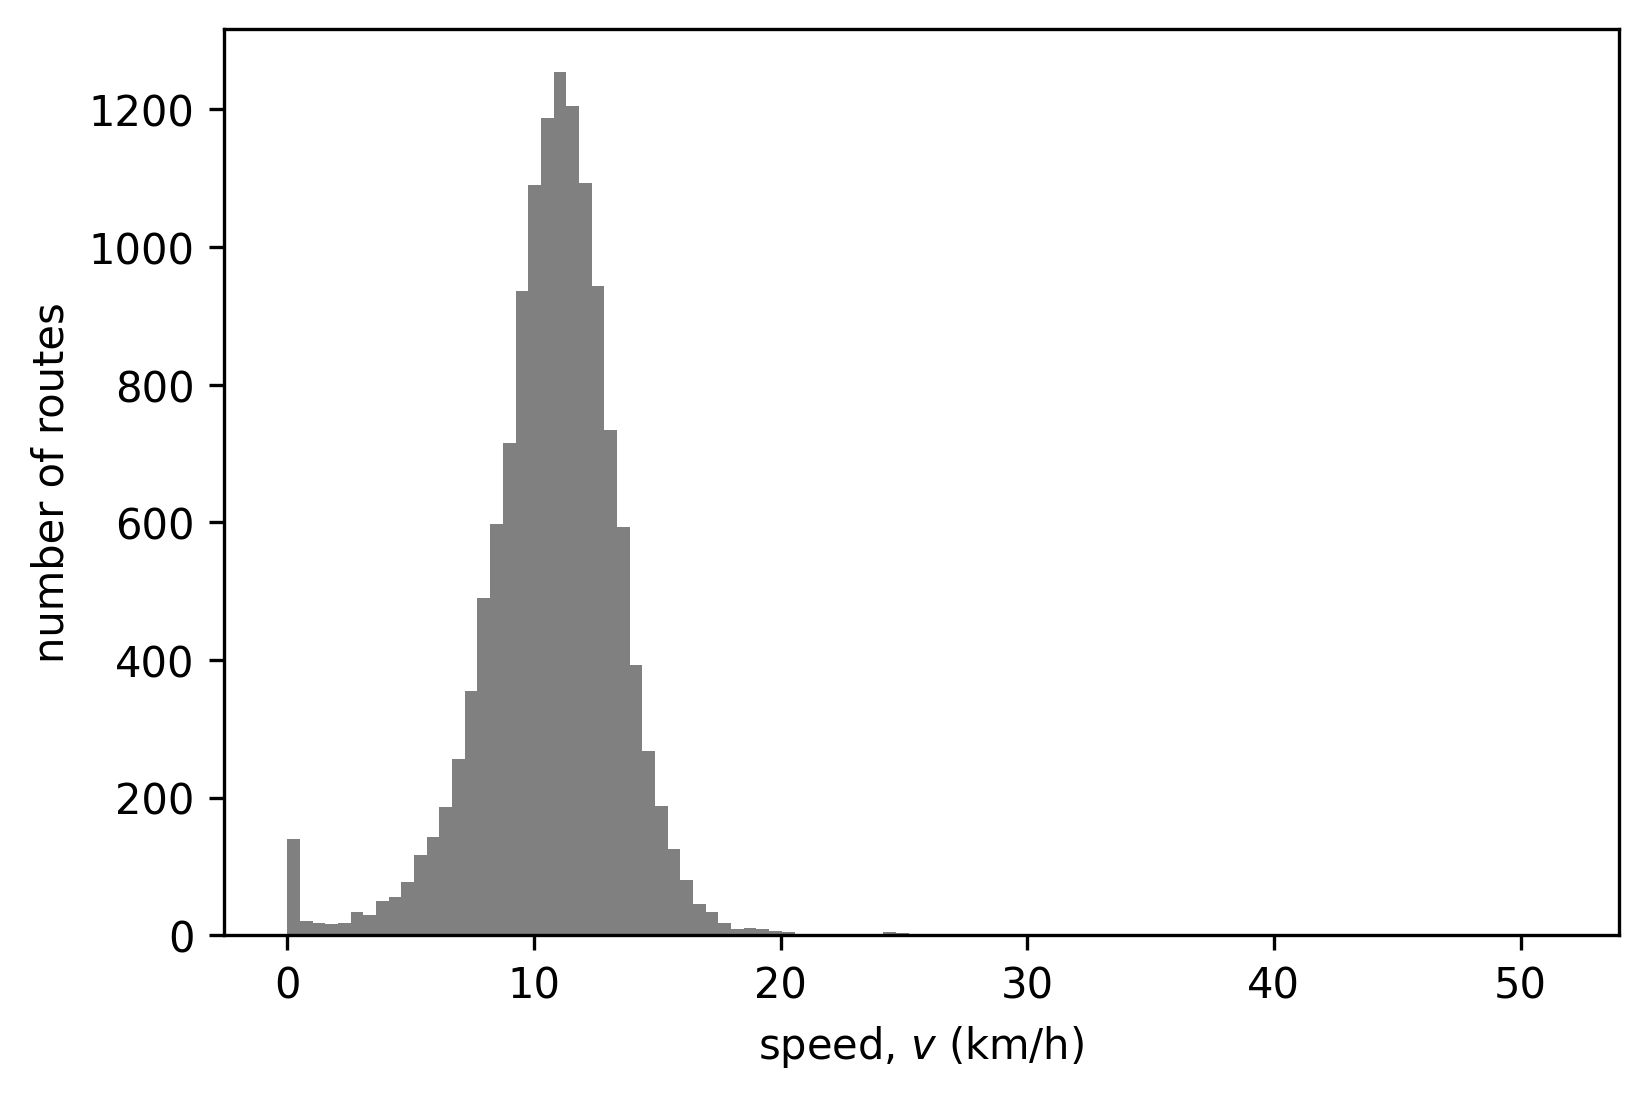

In [201]:
plt.figure(dpi=300)
plt.hist(mean_speed*3.6, bins=100, color='grey')
plt.xlabel('speed, $v$ (km/h)')
plt.ylabel('number of routes')

In [205]:
sf_stations.between_time('6:00', '9:00')

TypeError: Index must be DatetimeIndex

In [206]:
datetime_sf_station = sf_stations.set_index('start_time')

In [333]:
weekday_sf = datetime_sf_station[(datetime_sf_station.index.dayofweek != 5) | (datetime_sf_station.index.dayofweek != 6)]
weekday_activity = weekday_sf.groupby(by=[weekday_sf.index.hour]).size().reset_index().rename(columns={0:'count'})

In [329]:
weekend_sf = datetime_sf_station[(datetime_sf_station.index.dayofweek == 5) | (datetime_sf_station.index.dayofweek == 6)]
weekend_activity = weekend_sf.groupby(by=[weekend_sf.index.hour]).size().reset_index().rename(columns={0:'count'})
#.plot(kind='bar', xlabel='hour', ylabel='number of trips', color='grey')

<AxesSubplot:xlabel='hour', ylabel='number of trips'>

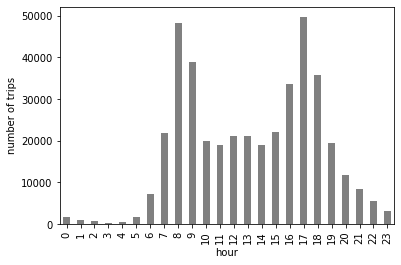

In [334]:
weekday_activity['count'].plot(kind='bar', xlabel='hour', ylabel='number of trips', color='grey')

<AxesSubplot:xlabel='hour', ylabel='number of trips'>

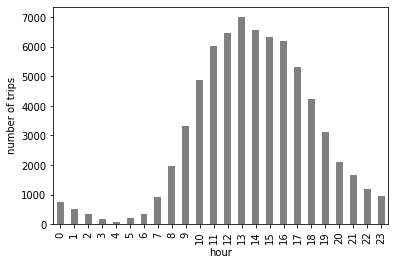

In [332]:
weekend_activity['count'].plot(kind='bar', xlabel='hour', ylabel='number of trips', color='grey')

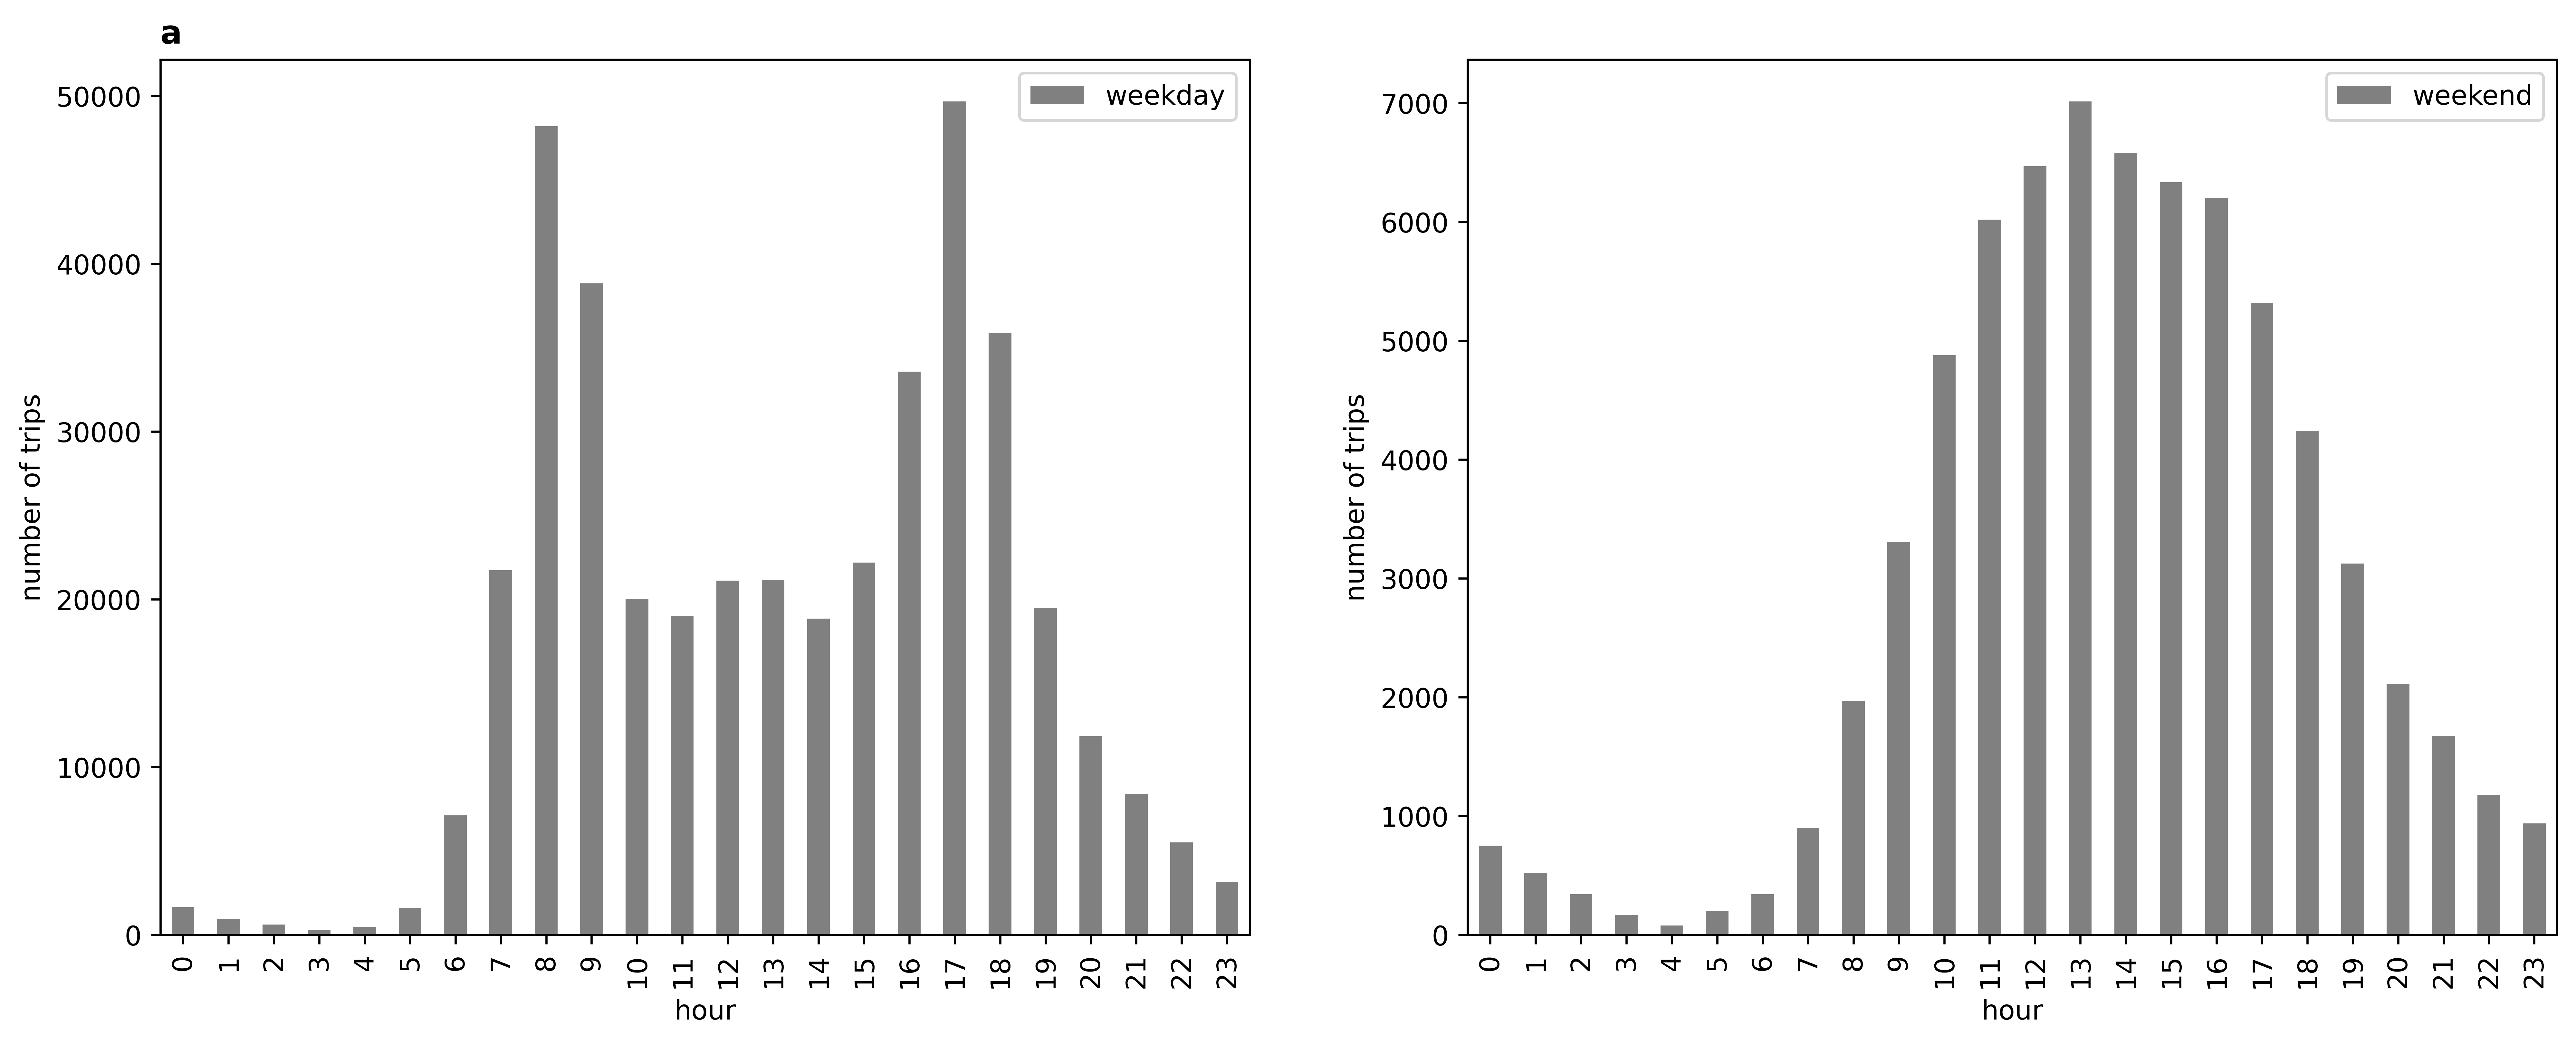

In [345]:
plt.figure(dpi=600, figsize=(16,6))

plt.subplot(121)
weekday_activity['count'].plot(kind='bar', xlabel='hour', ylabel='number of trips', color='grey', label = 'weekday')
plt.title('a', loc='left', fontweight='bold')
plt.legend()

plt.subplot(122)
weekend_activity['count'].plot(kind='bar', xlabel='hour', ylabel='number of trips', color='grey', label = 'weekend')
plt.legend()

plt.savefig('weekend_weekday_activity.png', bbox_inches='tight')

In [207]:
datetime_sf_station.head()

duration_sec                  end_time  \
start_time                                                        
2017-12-31 16:57:39.654         80110  2018-01-01 15:12:50.2450   
2017-12-31 15:56:34.842         78800  2018-01-01 13:49:55.6170   
2017-12-31 17:31:10.636         62172  2018-01-01 10:47:23.5310   
2017-12-31 22:51:00.918          9226  2018-01-01 01:24:47.1660   
2017-12-31 23:46:37.196          4334  2018-01-01 00:58:51.2110   

                         start_station_id  \
start_time                                  
2017-12-31 16:57:39.654                74   
2017-12-31 15:56:34.842               284   
2017-12-31 17:31:10.636                60   
2017-12-31 22:51:00.918                30   
2017-12-31 23:46:37.196               284   

                                                        start_station_name  \
start_time                                                                   
2017-12-31 16:57:39.654                              Laguna St at Hayes St   
2017-12-31 15:56:34.842  Yerba Buena Center for the Arts (Howard St at ...   
2017-12-31 17:31:10.636                               8th St at Ringold St   
2017-12-31 22:51:00.918     San Francisco Caltrain (Townsend St at 4th St)   
2017-12-31 23:46:37.196  Yerba Buena Center for the Arts (Howard St at ...   

                         start_station_latitude  start_station_longitude  \
start_time                                                                 
2017-12-31 16:57:39.654               37.776435              -122.426244   
2017-12-31 15:56:34.842               37.784872              -122.400876   
2017-12-31 17:31:10.636               37.774520              -122.409449   
2017-12-31 22:51:00.918               37.776598              -122.395282   
2017-12-31 23:46:37.196               37.784872              -122.400876   

                         end_station_id  \
start_time                                
2017-12-31 16:57:39.654              43   
2017-12-31 15:56:34.842              96   
2017-12-31 17:31:10.636               5   
2017-12-31 22:51:00.918              30   
2017-12-31 23:46:37.196             284   

                                                          end_station_name  \
start_time                                                                   
2017-12-31 16:57:39.654  San Francisco Public Library (Grove St at Hyde...   
2017-12-31 15:56:34.842                              Dolores St at 15th St   
2017-12-31 17:31:10.636       Powell St BART Station (Market St at 5th St)   
2017-12-31 22:51:00.918     San Francisco Caltrain (Townsend St at 4th St)   
2017-12-31 23:46:37.196  Yerba Buena Center for the Arts (Howard St at ...   

                         end_station_latitude  end_station_longitude  bike_id  \
start_time                                                                      
2017-12-31 16:57:39.654             37.778768            -122.415929       96   
2017-12-31 15:56:34.842             37.766210            -122.426614       88   
2017-12-31 17:31:10.636             37.783899            -122.408445     2831   
2017-12-31 22:51:00.918             37.776598            -122.395282     1487   
2017-12-31 23:46:37.196             37.784872            -122.400876     1503   

                        user_type  member_birth_year member_gender  \
start_time                                                           
2017-12-31 16:57:39.654  Customer             1987.0          Male   
2017-12-31 15:56:34.842  Customer             1965.0        Female   
2017-12-31 17:31:10.636  Customer                NaN           NaN   
2017-12-31 22:51:00.918  Customer                NaN           NaN   
2017-12-31 23:46:37.196  Customer                NaN           NaN   

                                            geometry  time_recip  
start_time                                                        
2017-12-31 16:57:39.654  POINT (-122.42624 37.77643)    0.000012  
2017-12-31 15:56:34.842  POINT (-122.40088 37.7848

In [209]:
morning_df = datetime_sf_station.between_time('6:00','9:00')
evening_df = datetime_sf_station.between_time('16:00', '19:00')
afternoon_df = datetime_sf_station.between_time('9:00', '16:00')
off_hour_df = datetime_sf_station.between_time('19:00', '6:00')

In [215]:
morning_group = morning_df.groupby\
(by=['start_station_id','start_station_latitude', 'start_station_longitude', 'end_station_id','end_station_latitude', 'end_station_longitude'])
evening_group = evening_df.groupby\
(by=['start_station_id','start_station_latitude', 'start_station_longitude', 'end_station_id','end_station_latitude', 'end_station_longitude'])
afternoon_group = afternoon_df.groupby\
(by=['start_station_id','start_station_latitude', 'start_station_longitude', 'end_station_id','end_station_latitude', 'end_station_longitude'])
off_hour_group = off_hour_df.groupby\
(by=['start_station_id','start_station_latitude', 'start_station_longitude', 'end_station_id','end_station_latitude', 'end_station_longitude'])

In [216]:
morning_trips = morning_group.size().reset_index().rename(columns={0:'count'})
evening_trips = evening_group.size().reset_index().rename(columns={0:'count'})
afternoon_trips = afternoon_group.size().reset_index().rename(columns={0:'count'})
off_hour_trips = off_hour_group.size().reset_index().rename(columns={0:'count'})

In [218]:
morning_trips.to_csv('morning_trips.csv')
evening_trips.to_csv('evening_trips.csv')
afternoon_trips.to_csv('afternoon_trips.csv')
off_hour_trips.to_csv('off_hour_trips.csv')

In [219]:
morning_route = pd.read_csv('data/morning_route_distance.csv')
evening_route = pd.read_csv('data/evening_route_distance.csv')
afternoon_route = pd.read_csv('data/afternoon_route_distance.csv')
off_hour_route = pd.read_csv('data/off_hour_route_distance.csv')

In [221]:
morning_dist = morning_route['route_distance']
evening_dist = evening_route['route_distance']
afternoon_dist = afternoon_route['route_distance']
off_hour_dist = off_hour_route['route_distance']

In [224]:
morning_sum = morning_group['time_recip'].sum().reset_index().rename(columns={0:'summation'})['time_recip'].to_numpy()
evening_sum = evening_group['time_recip'].sum().reset_index().rename(columns={0:'summation'})['time_recip'].to_numpy()
afternoon_sum = afternoon_group['time_recip'].sum().reset_index().rename(columns={0:'summation'})['time_recip'].to_numpy()
off_hour_sum = off_hour_group['time_recip'].sum().reset_index().rename(columns={0:'summation'})['time_recip'].to_numpy()

In [227]:
morning_speed = np.divide(np.multiply(morning_dist, morning_sum), morning_trips['count'].to_numpy())
evening_speed = np.divide(np.multiply(evening_dist, evening_sum), evening_trips['count'].to_numpy())
afternoon_speed = np.divide(np.multiply(afternoon_dist, afternoon_sum), afternoon_trips['count'].to_numpy())
off_hour_speed = np.divide(np.multiply(off_hour_dist, off_hour_sum), off_hour_trips['count'].to_numpy())

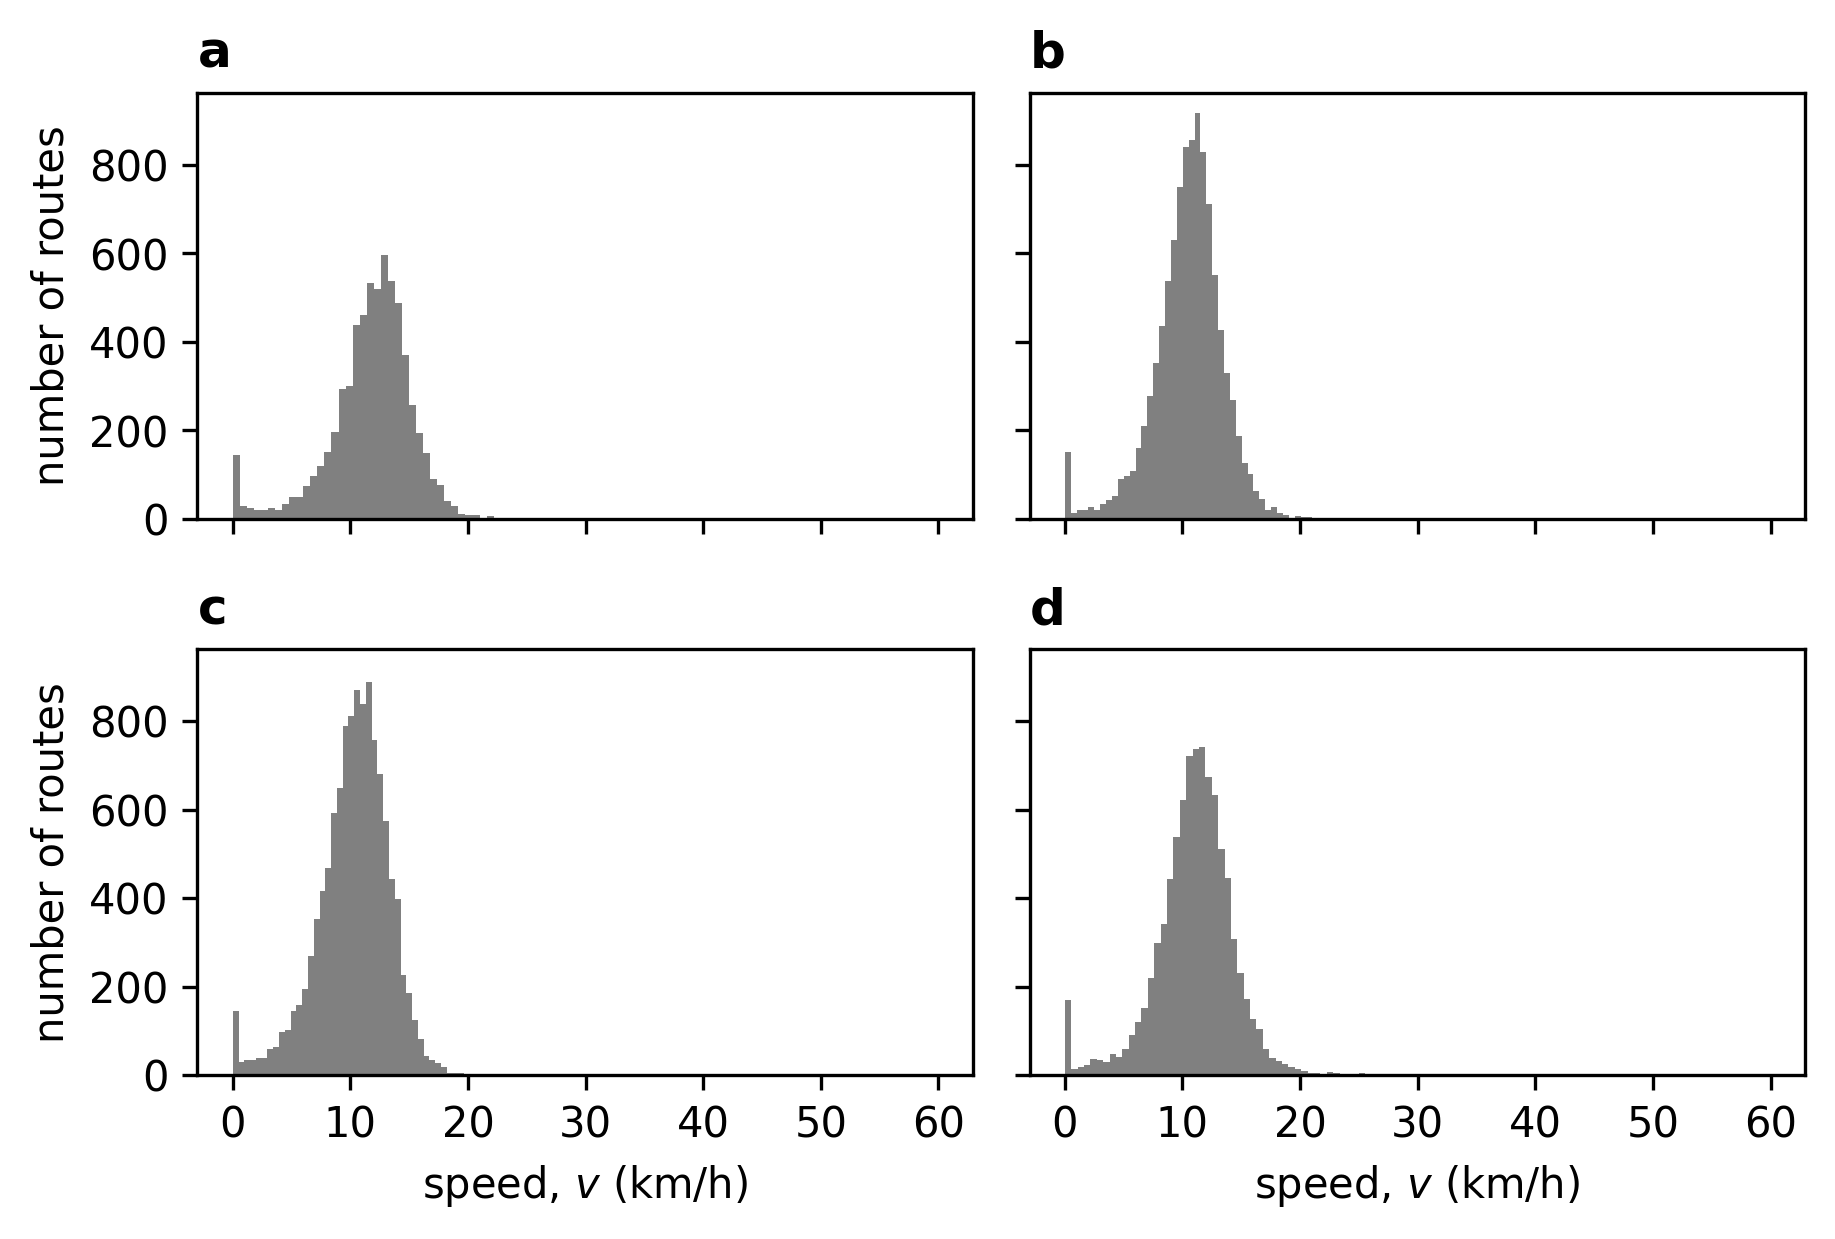

In [282]:
fig, axs = plt.subplots(2,2, dpi=300, sharex=True, sharey=True)
axs[0,0].hist(morning_speed*3.6, bins=100, color='grey')
axs[0,0].set_title('a', loc='left', fontweight='bold')
#axs[0,0].set_xlabel('speed, $v$ (km/h)')
#axs[0,0].set_ylabel('number of routes')
axs[0,0].set_xticks(np.arange(0,70,10))
axs[0,0].set_yticks(np.arange(0,950,200))

axs[0,1].hist(evening_speed*3.6, bins=100, color='grey')
axs[0,1].set_title('b', loc='left', fontweight='bold')
#axs[0,1].set_xlabel('speed, $v$ (km/h)')
#axs[0,1].set_ylabel('number of routes')

axs[1,0].hist(afternoon_speed*3.6, bins=100, color='grey')
axs[1,0].set_title('c', loc='left', fontweight='bold')
#axs[1,0].set_xlabel('speed, $v$ (km/h)')
#axs[1,0].set_ylabel('number of routes')

axs[1,1].hist(off_hour_speed*3.6, bins=100, color='grey')
axs[1,1].set_title('d', loc='left', fontweight='bold')
#axs[1,1].set_xlabel('speed, $v$ (km/h)')
#axs[1,1].set_ylabel('number of routes')

fig.tight_layout(pad=1.0)
plt.setp(axs[-1, :], xlabel='speed, $v$ (km/h)')
plt.setp(axs[:, 0], ylabel='number of routes')

plt.savefig('speed_dist.png', bbox_inches='tight')

In [290]:
morning_speed.mean()*3.6

11.783607020805881

In [291]:
evening_speed.mean()*3.6

10.492967962659307

In [292]:
afternoon_speed.mean()*3.6

10.276260325157013

In [293]:
off_hour_speed.mean()*3.6

11.000128727922954

In [368]:
(morning_speed.mean() + evening_speed.mean() + afternoon_speed.mean() + off_hour_speed.mean()) * 3.6 / 4.0

10.88824100913629

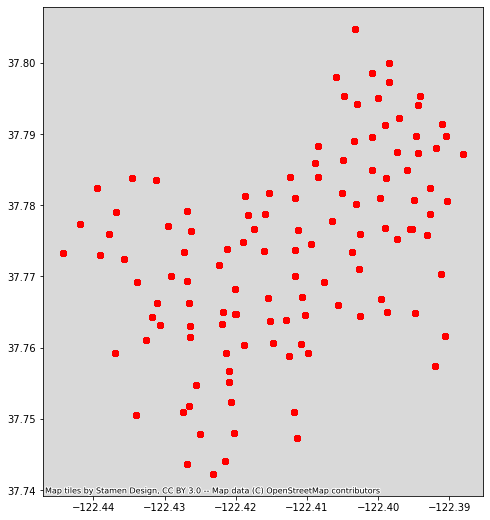

In [138]:
ax = sf_stations.plot(color="red", figsize=(9, 9))
#cx.add_basemap(ax, crs=sf_stations.crs.to_string(), source=cx.providers.Stamen.TonerLite)
cx.add_basemap(ax, zoom=13, source=cx.providers.Stamen.TonerLite)

<AxesSubplot:xlabel='X', ylabel='Y'>

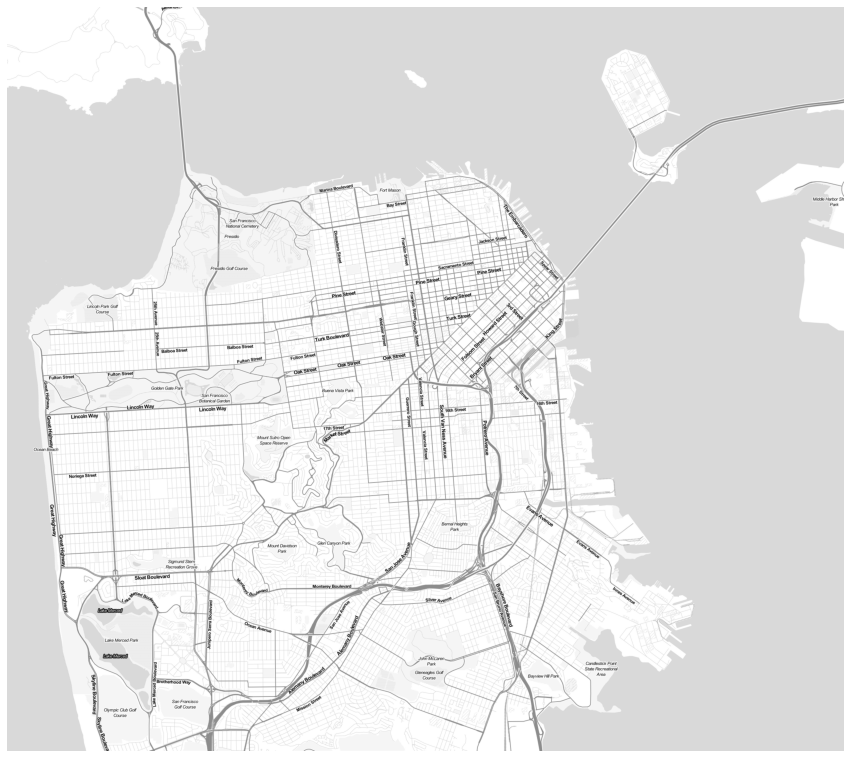

In [106]:
im2, bbox = cx.bounds2img(w, s, e, n, zoom=14, ll=True, source=cx.providers.Stamen.TonerLite)
cx.plot_map(im2, bbox)#, title="San Francisco, CA")

In [238]:
sf_stations.head()

duration_sec              start_time                  end_time  \
0         80110 2017-12-31 16:57:39.654  2018-01-01 15:12:50.2450   
1         78800 2017-12-31 15:56:34.842  2018-01-01 13:49:55.6170   
3         62172 2017-12-31 17:31:10.636  2018-01-01 10:47:23.5310   
5          9226 2017-12-31 22:51:00.918  2018-01-01 01:24:47.1660   
7          4334 2017-12-31 23:46:37.196  2018-01-01 00:58:51.2110   

   start_station_id                                 start_station_name  \
0                74                              Laguna St at Hayes St   
1               284  Yerba Buena Center for the Arts (Howard St at ...   
3                60                               8th St at Ringold St   
5                30     San Francisco Caltrain (Townsend St at 4th St)   
7               284  Yerba Buena Center for the Arts (Howard St at ...   

   start_station_latitude  start_station_longitude  end_station_id  \
0               37.776435              -122.426244              43   
1               37.784872              -122.400876              96   
3               37.774520              -122.409449               5   
5               37.776598              -122.395282              30   
7               37.784872              -122.400876             284   

                                    end_station_name  end_station_latitude  \
0  San Francisco Public Library (Grove St at Hyde...             37.778768   
1                              Dolores St at 15th St             37.766210   
3       Powell St BART Station (Market St at 5th St)             37.783899   
5     San Francisco Caltrain (Townsend St at 4th St)             37.776598   
7  Yerba Buena Center for the Arts (Howard St at ...             37.784872   

   end_station_longitude  bike_id user_type  member_birth_year member_gender  \
0            -122.415929       96  Customer             1987.0          Male   
1            -122.426614       88  Customer             1965.0        Female   
3            -122.408445     2831  Customer                NaN           NaN   
5            -122.395282     1487  Customer                NaN           NaN   
7            -122.400876     1503  Customer                NaN           NaN   

                      geometry  
0  POINT (-122.42624 37.77643)  
1  POINT (-122.40088 37.78487)  
3  POINT (-122.40945 37.77452)  
5  POINT (-122.39528 37.77660)  
7  POINT (-122.40088 37.78487)

In [ ]:
sf_stations.groupby(by=['start_station_id', 'end_station_id']).hist(column='duration_sec')

In [ ]:
2*2

In [31]:
starttime_df = pd.to_datetime(sf_2017['start_time'])
endtime_df = pd.to_datetime(sf_2017['end_time'])

In [63]:
sf_2017['start_time'] = pd.to_datetime(sf_2017['start_time'])
sf_2017['end_time'] = pd.to_datetime(sf_2017['end_time'])

In [64]:
time_sf = sf_2017.set_index('start_time')

In [68]:
time_sf = sf_2017.resample('H', on='start_time').size()

In [69]:
time_sf

start_time
2017-06-28 09:00:00     7
2017-06-28 10:00:00    46
2017-06-28 11:00:00    33
2017-06-28 12:00:00    44
2017-06-28 13:00:00    40
                       ..
2017-12-31 19:00:00    45
2017-12-31 20:00:00    42
2017-12-31 21:00:00    50
2017-12-31 22:00:00    43
2017-12-31 23:00:00    48
Freq: H, Length: 4479, dtype: int64

In [84]:
daily_sf = sf_2017.resample('D', on='start_time').size()#.groupby(sf_2017.resample('D', on='start_time').size().index.day).mean().plot(grid=True)

In [96]:
daily_sf.sum()

519700

In [126]:
sf_2017.head()

duration_sec              start_time                end_time  \
0         80110 2017-12-31 16:57:39.654 2018-01-01 15:12:50.245   
1         78800 2017-12-31 15:56:34.842 2018-01-01 13:49:55.617   
2         45768 2017-12-31 22:45:48.411 2018-01-01 11:28:36.883   
3         62172 2017-12-31 17:31:10.636 2018-01-01 10:47:23.531   
4         43603 2017-12-31 14:23:14.001 2018-01-01 02:29:57.571   

   start_station_id                                 start_station_name  \
0                74                              Laguna St at Hayes St   
1               284  Yerba Buena Center for the Arts (Howard St at ...   
2               245                             Downtown Berkeley BART   
3                60                               8th St at Ringold St   
4               239                      Bancroft Way at Telegraph Ave   

   start_station_latitude  start_station_longitude  end_station_id  \
0               37.776435              -122.426244              43   
1               37.784872              -122.400876              96   
2               37.870348              -122.267764             245   
3               37.774520              -122.409449               5   
4               37.868813              -122.258764             247   

                                    end_station_name  end_station_latitude  \
0  San Francisco Public Library (Grove St at Hyde...             37.778768   
1                              Dolores St at 15th St             37.766210   
2                             Downtown Berkeley BART             37.870348   
3       Powell St BART Station (Market St at 5th St)             37.783899   
4                          Fulton St at Bancroft Way             37.867789   

   end_station_longitude  bike_id   user_type  member_birth_year  \
0            -122.415929       96    Customer             1987.0   
1            -122.426614       88    Customer             1965.0   
2            -122.267764     1094    Customer                NaN   
3            -122.408445     2831    Customer                NaN   
4            -122.265896     3167  Subscriber             1997.0   

  member_gender                     geometry  
0          Male  POINT (-122.42624 37.77643)  
1        Female  POINT (-122.40088 37.78487)  
2           NaN  POINT (-122.26776 37.87035)  
3           NaN  POINT (-122.40945 37.77452)  
4        Female  POINT (-122.25876 37.86881)

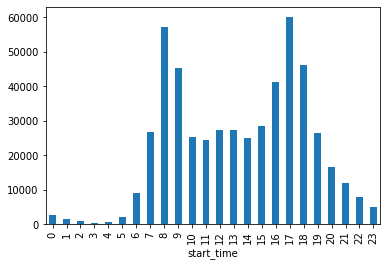

In [129]:
hourly_ax = time_sf.groupby(time_sf.index.hour).sum().plot(kind='bar')
#hourly_ax.set_xlabel('Hour of the day')
#hourly_ax.set_ylabel('Average number of users')
#hourly_ax.set_xticks(np.arange(0,24))

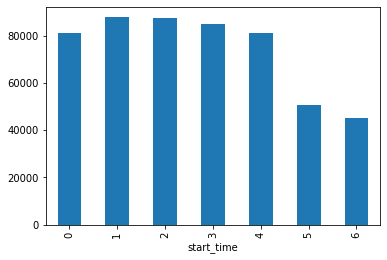

In [132]:
daily_ax = time_sf.groupby(time_sf.index.dayofweek).sum().plot(kind='bar')
plt.
#daily_ax.set_xlabel('Day of the week')
#daily_ax.set_ylabel('Average number of users')
#daily_ax.set_xticks(np.arange(1,8))

In [80]:
time_sf.index.day

Int64Index([28, 28, 28, 28, 28, 28, 28, 28, 28, 28,
            ...
            31, 31, 31, 31, 31, 31, 31, 31, 31, 31],
           dtype='int64', name='start_time', length=4479)

In [105]:
sf_2017.groupby(sf_2017.start_time.dt.hour).size()

start_time
0      2606
1      1377
2       860
3       398
4       640
5      2145
6      8895
7     26800
8     57227
9     45457
10    25217
11    24303
12    27448
13    27374
14    24900
15    28448
16    41339
17    60111
18    46088
19    26598
20    16642
21    11993
22     7967
23     4867
dtype: int64